# <center>" AML 2203 - Advanced Python AI and ML Tools "</center>

<a id="0"></a> 
# Project - Analysis of building a Recommendation System with text data (Content Based Filtering)


### Group Members

- Aishlee C0913045
- Guruprasad Tandlekar C0902813
- Jayachandhran Saravanan C0910392
- Prashanta Timsina C0916254
- Rohan Aryan C0912902
- Yogita Sharma C0913011

### Dataset and Onedrive links :

The following are the one-drive links of,

- __Dataset :__ https://mylambton-my.sharepoint.com/:f:/g/personal/c0910392_mylambton_ca/EqWGEhpsJtRKmgeovd9BLm8BcsQtlueNawshu2l5fmWl0Q?e=Xl9I0c

- __Whole working folder :__ https://mylambton-my.sharepoint.com/:f:/g/personal/c0910392_mylambton_ca/EsRdUhKFia1IpLjeQKWeMVoBGzkAFZ5WqzvjY25gi8c85A?e=dEwtQH


- __Github :__ https://github.com/svjai/AML_2203_project


# Table of Contents



#### [Data_scrapping](#1)

#### [Data Validation](#2)
#### [Data Validation_text_data](#3)
#### [Text processing](#4)
#### [Visualization_(mining_insights)](#5)
#### [word_embedding_model](#6)
#### [Approach_1](#7)
#### [Approach_2](#8)
#### [Approach_3](#9)
#### [Evaluation](#10)
#### [annexure](#11)






<a id="1"></a> 
## Data_Scarpping
#### [back](#0)

The datascrapping is done using the API technique and the max limitation cap for scrapping is acheived on particular IP, therefore proxy route table is used to fetch the data.

All the scrapped data can be found here: https://github.com/svjai/AML_2203_project/tree/main/project/data

The book data scrapped for this project contains TEXT, NUMERIC and BINARY data types with 16 feature columns. Following domains are taken into consideration : "business, mindfulness, and computer" (Artificial Intelligence / AI, network, User Interface / UI, Databases / DB, languages, etc) based books data.

In [3]:
# importing the required libraries 
import nltk
import pandas as pd                          
import numpy as np                          
import matplotlib.pyplot as plt             
import seaborn as sns                       
import re                                   
from PIL import Image                        
from wordcloud import WordCloud, STOPWORDS  
import nltk                                  
from nltk.corpus import stopwords            
from nltk.tokenize import word_tokenize     
from textblob import TextBlob               
import emoji                                 
import unicodedata                          
import warnings                             
warnings.filterwarnings('ignore')   
import logging
from IPython.display import display

from collections import Counter
from nltk.stem import WordNetLemmatizer
import string
from sklearn.manifold import TSNE
import tqdm
from nltk.tokenize import sent_tokenize
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SMOTE # for SMOTE technique

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer


from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


<a id="2"></a> 
## Data_validation
#### [back](#0)
- first understanding the data 
- the non-text fields are validated followed by text data
- missing values, duplicate values and outliers are checked
- correlation and pandas profiling is done to get more insights on the data 

In [4]:
# load the dataset from the 'csv' file
df = pd.read_csv("scrapped_data_version_1_comp_business_mind.csv")

In [5]:
# display the first and last 5 records of the dataset
display(df.head())
display(df.tail())

Book_title    book_id  book_price  \
0              Software Engineering at Google  209970024       71.99   
1             The Software Architect Elevator  209997033       71.99   
2               Software Architecture Metrics  210567692       71.99   
3  Designing Hexagonal Architecture with Java  211106723       46.99   
4                    OpenStack for Architects   96237030       44.99   

     author_name(s)    publisher_name  publication_year  \
0     Titus Winters    O'Reilly Media              2020   
1      Gregor Hohpe    O'Reilly Media              2020   
2  Christian Ciceri    O'Reilly Media              2022   
3       Davi Vieira  Packt Publishing              2023   
4   Michael Solberg  Packt Publishing              2018   

                                      sub_title_book book_edition  \
0         Lessons Learned from Programming Over Time          NaN   
1  Redefining the Architect's Role in the Digital...          NaN   
2                                                NaN          NaN   
3  Build maintainable and long-lasting applicatio...          NaN   
4  Design production-ready private cloud infrastr...          NaN   

                                         description  book_availablity  \
0  Today, software engineers need to know not onl...              True   
1  As the digital economy changes the rules of th...              True   
2  Software architecture metrics are key to the m...              True   
3                                                NaN              True   
4                                                NaN              True   

          date_of_sale year_month  author_count  common_width  common_heighy  \
0  2020-02-28T00:00:00   Feb 2020             3            97            150   
1  2020-04-08T00:00:00   Apr 2020             1            97            150   
2  2022-05-18T00:00:00   May 2022            10            97            150   
3  2023-09-29T00:00:00   Sep 2023             1            97            150   
4  2018-05-31T00:00:00   May 2018             2            97            150   

  category_verification  
0                  arch  
1                  arch  
2                  arch  
3                  arch  
4                  arch

Book_title    book_id  book_price  \
43050                    Mindful Metamorphosis  210845308        5.99   
43051   Beautiful Women: A View from the Heart  210845546        6.99   
43052                       Feminine Reclaimed  210809341        6.99   
43053                         Celtic Mythology  210770637        3.99   
43054  Discover & Use Your Greatest Superpower  210845836       13.99   

        author_name(s)      publisher_name  publication_year  \
43050          Schalin    New Degree Press              2023   
43051  Charlie Garland    New Degree Press              2023   
43052     Michele Wong    New Degree Press              2023   
43053      Adam Andino  Rivercat Books LLC              2023   
43054  Carina Marshall    New Degree Press              2023   

                                         sub_title_book book_edition  \
43050     A Compassionate Guide to Inner Transformation          NaN   
43051  Stories of Inspiration to Help Mend a Torn World          NaN   
43052                                          A Memoir          NaN   
43053                    Tales From the Celtic Pantheon          NaN   
43054                                               NaN          NaN   

                                             description  book_availablity  \
43050  Unlocking your potential has never been easier...              True   
43051  Beautiful Women: A View from the Heart contain...              True   
43052  There comes a point in everyone's life where w...              True   
43053  CELTIC MYTHOLOGY "Celtic Mythology: Tales from...              True   
43054  This book introduces you to an extended identi...              True   

              date_of_sale year_month  author_count  common_width  \
43050  2023-05-10T00:00:00   May 2023             1            97   
43051  2023-05-11T00:00:00   May 2023             1            97   
43052  2023-03-24T00:00:00   Mar 2023             1            97   
43053  2023-02-15T00:00:00   Feb 2023             1            97   
43054  2023-05-12T00:00:00   May 2023             1            97   

       common_heighy category_verification  
43050            150          info_mindful  
43051            150          info_mindful  
43052            150          info_mindful  
43053            150          info_mindful  
43054            150          info_mindful

In [6]:
def validation(df):
    
    """
    arg: df --> dataframe to check the data and validate the data features
    func: analyse the data parameters and display the characteristics using various methods
    return: display all the basic data validation
    """
    
    print("shape of the data: {} \n number of rows {}\n number of columns {}".format(df.shape,df.shape[0],df.shape[1]))
    print("="*60)
    b_color = "\033[0m"
    color = "\033[95m"
    print(color + "\n*** Information of the Dataset ***\n" + b_color)
    print(df.info())
    print("="*60)
    
   
    color = "\033[38;2;139;69;19m"
    print(color + '\n*** Columns in Dataframe ***\n\n' + b_color, df.columns)
    print("="*60)
    
    # checking for null or missing values
    color = "\033[94m"
    print(color + "\n*** Null values in the Dataset ***\n" + b_color)
    print(df.isnull().sum())
    print("="*60)
    print(df.isnull().mean()*100)
    print("="*60)
    
    
    # find the duplicate rows in the dataset
    print(f'\033[0mNumber of duplicate entries in the dataset are: \033[94m{df.duplicated().sum()}')
    print("="*60)
    
    
    # firstly, know the numerical and categorical columns from the dataset

    num_features = [i for i in df.columns if df[i].dtypes != 'O']
    cat_features = [j for j in df.columns if df[j].dtypes == 'O']
    print("\033[95mNumber of Numerical Features: \033[0m", len(num_features))
    print("\033[91m\nNumerical Features: \033[0m", end = '')
    print(num_features)
    print("\n\033[95mNumber of Categorical Features: \033[0m", len(cat_features))
    print("\033[91m\nCategorical Features: \033[0m", end = '')
    print(cat_features)
    print("="*60)

In [7]:
## keeping the data copy for redudance 

df_red=df.copy()

In [8]:
validation(df)

shape of the data: (43055, 16) 
 number of rows 43055
 number of columns 16

*** Information of the Dataset ***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43055 entries, 0 to 43054
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Book_title             43055 non-null  object 
 1   book_id                43055 non-null  int64  
 2   book_price             42776 non-null  float64
 3   author_name(s)         43044 non-null  object 
 4   publisher_name         43055 non-null  object 
 5   publication_year       43055 non-null  int64  
 6   sub_title_book         30499 non-null  object 
 7   book_edition           3398 non-null   object 
 8   description            38031 non-null  object 
 9   book_availablity       43055 non-null  bool   
 10  date_of_sale           43055 non-null  object 
 11  year_month             43055 non-null  object 
 12  author_count           43055 non-null  int64 

<a id="3"></a> 
## data_understanding
#### [back](#0)

Each entry in the dataset corresponds to a unique book entry, corresponding to various attributes such as book ID, book title, author name, description, publisher, edition, etc. The features provided for each record include:

- __Book_title:__ the title of a book
- __book_id:__ an unique identifier for each book in the dataset
- __book_price:__ the price of the particular book
- __author_name(s):__ the name(s) of the author(s) of the particular book
- __publisher_name:__ the name of the publisher of the book
- __publisher_year:__ the year when the book was published
- __sub_title_book:__ the subtitle of the book, if any
- __book_edition:__ the edition of the book, if applicable
- __description:__ a detailed description oor summary of the book
- __book_availability:__ ivailability status of the book, whether a book is in stock or not.
- __date_of_sale:__ the date when the book was sold
- __year_month:__ year and month of the sale
- __author_count:__ the count of authors associated with the books
- __common_width:__ width dimension of the book (in cm)
- __common_height:__ height dimension of the book (in cm)
- __category_verification:__ verification status of the book category 

<a id="4"></a> 
## Inference_1

- the validation of the data shows few missing values and duplicated records
- Data type of the columns are mismatched and need to process the date columns and the binary columns
- equal amount of numerical and categorical columns are present 
- the unique values of the categorical values need to be analysed, similarly the outliers for the numeric values need to tested
- feature selection based on the signifance need to be justified
- missing values of columns book_price,author_name(s),sub_title_book,book_edition,description are found --> sub_title and the book edition has more than missing counts with percentange of 30% and 92
- 788 records are founded repeatative --> inspection needed thought the percentage is less than 2%

In [9]:
# datatyoe of the date based columns are handles 

df['updated_date_column'] = pd.to_datetime(df['date_of_sale'])
df['updated_month']=df['updated_date_column'].dt.month
df['updated_date']=df['updated_date_column'].dt.day

In [13]:
def analysis_cat(df):
    """
    arg: dataframe to check the charcter of the catgorical columns 
    func: analysis of unique values (varience in the columns), number of unique values
    return: 
    """
    cat_analysis=[]
    cat_columns=df.select_dtypes(include='object').columns
    for cat in cat_columns:
        print("analysing the column {}".format(cat))
        
        temp_unique_values=df[cat].unique()
        count_of_unique_values=df[cat].nunique()
        print("number of unique values :{}".format(count_of_unique_values))
#         print(temp_unique_values)
        cat_analysis.append({f'{cat}:{count_of_unique_values}'})
        
    return cat_analysis

In [14]:
cat_analysi_raw=analysis_cat(df)

analysing the column Book_title
number of unique values :35443
analysing the column author_name(s)
number of unique values :27985
analysing the column publisher_name
number of unique values :908
analysing the column sub_title_book
number of unique values :27406
analysing the column book_edition
number of unique values :20
analysing the column description
number of unique values :35948
analysing the column date_of_sale
number of unique values :6991
analysing the column year_month
number of unique values :461
analysing the column category_verification
number of unique values :11


In [15]:
cat_analysi_raw

[{'Book_title:35443'},
 {'author_name(s):27985'},
 {'publisher_name:908'},
 {'sub_title_book:27406'},
 {'book_edition:20'},
 {'description:35948'},
 {'date_of_sale:6991'},
 {'year_month:461'},
 {'category_verification:11'}]

In [16]:
def numeric_analysi(df):
    """
    arg:data frame
    function: analysis the numeric values
    """
    num_analysis=[]
    num_columns=df.select_dtypes(include=[np.number]).columns
    stats_num=df[list(num_columns)].describe([.1,.25,.50,.75,.9]).T
    for num in num_columns:
        print("analysi of the numeric column {}".format(num))
        skew=df[num].skew()
        kurtosis=df[num].kurtosis()
        rang_=df[num].max()-df[num].min()
        iqr=df[num].quantile(.75)-df[num].quantile(.25)
        num_analysis.append({"{}".format(num):{'skew':skew,'kurtosis':kurtosis,'range':rang_,'inter_quartile':iqr}})
    return stats_num,num_analysis

In [17]:
stat,distributuin=numeric_analysi(df)

analysi of the numeric column book_id
analysi of the numeric column book_price
analysi of the numeric column publication_year
analysi of the numeric column author_count
analysi of the numeric column common_width
analysi of the numeric column common_heighy
analysi of the numeric column updated_month
analysi of the numeric column updated_date


In [18]:
stat

count          mean           std       min        10%  \
book_id           43055.0  9.776120e+07  9.629440e+07  102073.0  602828.20   
book_price        42776.0  6.522971e+01  5.848166e+01       0.0       9.99   
publication_year  43055.0  2.013356e+03  2.170085e+01    1753.0    2007.00   
author_count      43055.0  1.956614e+00  1.592760e+00       0.0       1.00   
common_width      43055.0  9.700000e+01  0.000000e+00      97.0      97.00   
common_heighy     43055.0  1.500000e+02  0.000000e+00     150.0     150.00   
updated_month     43055.0  6.822274e+00  3.460842e+00       1.0       2.00   
updated_date      43055.0  1.601531e+01  9.473793e+00       1.0       3.00   

                         25%           50%           75%           90%  \
book_id           1576804.50  9.579747e+07  2.101831e+08  2.107387e+08   
book_price             23.99  5.495535e+01  7.542209e+01  1.323370e+02   
publication_year     2011.00  2.016000e+03  2.020000e+03  2.022000e+03   
author_count            1.00  1.000000e+00  2.000000e+00  4.000000e+00   
common_width           97.00  9.700000e+01  9.700000e+01  9.700000e+01   
common_heighy         150.00  1.500000e+02  1.500000e+02  1.500000e+02   
updated_month           4.00  7.000000e+00  1.000000e+01  1.200000e+01   
updated_date            7.00  1.600000e+01  2.500000e+01  2.900000e+01   

                           max  
book_id           2.112693e+08  
book_price        2.367576e+03  
publication_year  2.025000e+03  
author_count      5.900000e+01  
common_width      9.700000e+01  
common_heighy     1.500000e+02  
updated_month     1.200000e+01  
updated_date      3.100000e+01

In [19]:
distributuin

[{'book_id': {'skew': 0.16234071726577987,
   'kurtosis': -1.807035325605966,
   'range': 211167216,
   'inter_quartile': 208606326.5}},
 {'book_price': {'skew': 4.05410576050624,
   'kurtosis': 77.66920459931839,
   'range': 2367.576485,
   'inter_quartile': 51.43208672}},
 {'publication_year': {'skew': -10.896430387024832,
   'kurtosis': 127.29231031246155,
   'range': 272,
   'inter_quartile': 9.0}},
 {'author_count': {'skew': 5.868031056852699,
   'kurtosis': 114.87235724204194,
   'range': 59,
   'inter_quartile': 1.0}},
 {'common_width': {'skew': 0,
   'kurtosis': 0,
   'range': 0,
   'inter_quartile': 0.0}},
 {'common_heighy': {'skew': 0,
   'kurtosis': 0,
   'range': 0,
   'inter_quartile': 0.0}},
 {'updated_month': {'skew': -0.11390342007232404,
   'kurtosis': -1.1915411207152253,
   'range': 11,
   'inter_quartile': 6.0}},
 {'updated_date': {'skew': -0.01852118192709003,
   'kurtosis': -1.2959700023456855,
   'range': 30,
   'inter_quartile': 18.0}}]

In [20]:
def date_analysis(df,col):
    """
    arg : df --> dataframer
    arg: col --> date columns only
    function: finding the maximum and minimum date values
    return
    """
    date_=[]
    min_date=df[col].min()
    max_date=df[col].max()
    min_year=min_date.year
    max_year=max_date.year
    num_days=df[col].nunique()
    return ({"oldes_date":min_date,"latest_date":max_date,"old_year":min_year,"recent":max_year})
    

In [21]:
date_analysis(df,'updated_date_column')

{'oldes_date': Timestamp('1753-01-01 00:00:00'),
 'latest_date': Timestamp('2025-03-04 00:00:00'),
 'old_year': 1753,
 'recent': 2025}

<a id="5"></a> 
## Inference_2

### category
- the analysis of the categorical values give clear picture on the values present in the each categories and the varience with the value counts are calculated 
- 27K+ authors are found
- more than 900 publishers
- the editions of thr books are going till 20

### numeric
- the numeric analysis of the data is done on the note of finding the outliers and the distribution of the data in the given data
- the columns like common height, common_width,book_id are not significant
- the book price --> one of the indirect target varible is showing positive sknewness with heavy tail
- the date fields are showing negative skewness of the date columns

### date

- the date analysis gives the clear understanding of the date outliers with clear distinguhising 

In [22]:
df = df.drop_duplicates()

In [23]:
df_before=df.copy()

<a id="4"></a> 
## text_processing
#### [back](#0)

In [24]:
df['description'] = df['description'].fillna('')

In [25]:
def counts_(tok):
    word_=nltk.word_tokenize(tok)
    word_count=len(nltk.word_tokenize(tok))
    sent_count=len(nltk.sent_tokenize(tok))
    stopwords_=set(stopwords.words('english'))
    stp_count=sum(1 for i in word_ if i.lower() in stopwords_)
    spl_count=sum(1 for j in tok if j in set(string.punctuation) )
    return word_count, sent_count, stp_count, spl_count
    


In [26]:
df['word_count'], df['sent_count'], df['stp_count'], df['spl_count'] = zip(*df['description'].apply(counts_))
print(df.head())  # Display the DataFrame with added columns

                                   Book_title    book_id  book_price  \
0              Software Engineering at Google  209970024       71.99   
1             The Software Architect Elevator  209997033       71.99   
2               Software Architecture Metrics  210567692       71.99   
3  Designing Hexagonal Architecture with Java  211106723       46.99   
4                    OpenStack for Architects   96237030       44.99   

     author_name(s)    publisher_name  publication_year  \
0     Titus Winters    O'Reilly Media              2020   
1      Gregor Hohpe    O'Reilly Media              2020   
2  Christian Ciceri    O'Reilly Media              2022   
3       Davi Vieira  Packt Publishing              2023   
4   Michael Solberg  Packt Publishing              2018   

                                      sub_title_book book_edition  \
0         Lessons Learned from Programming Over Time          NaN   
1  Redefining the Architect's Role in the Digital...          NaN   
2    

In [27]:
df

Book_title    book_id  book_price  \
0                  Software Engineering at Google  209970024       71.99   
1                 The Software Architect Elevator  209997033       71.99   
2                   Software Architecture Metrics  210567692       71.99   
3      Designing Hexagonal Architecture with Java  211106723       46.99   
4                        OpenStack for Architects   96237030       44.99   
...                                           ...        ...         ...   
43050                       Mindful Metamorphosis  210845308        5.99   
43051      Beautiful Women: A View from the Heart  210845546        6.99   
43052                          Feminine Reclaimed  210809341        6.99   
43053                            Celtic Mythology  210770637        3.99   
43054     Discover & Use Your Greatest Superpower  210845836       13.99   

         author_name(s)      publisher_name  publication_year  \
0         Titus Winters      O'Reilly Media              2020   
1          Gregor Hohpe      O'Reilly Media              2020   
2      Christian Ciceri      O'Reilly Media              2022   
3           Davi Vieira    Packt Publishing              2023   
4       Michael Solberg    Packt Publishing              2018   
...                 ...                 ...               ...   
43050           Schalin    New Degree Press              2023   
43051   Charlie Garland    New Degree Press              2023   
43052      Michele Wong    New Degree Press              2023   
43053       Adam Andino  Rivercat Books LLC              2023   
43054   Carina Marshall    New Degree Press              2023   

                                          sub_title_book book_edition  \
0             Lessons Learned from Programming Over Time          NaN   
1      Redefining the Architect's Role in the Digital...          NaN   
2                                                    NaN          NaN   
3      Build maintainable and long-lasting applicatio...          NaN   
4      Design production-ready private cloud infrastr...          NaN   
...                                                  ...          ...   
43050      A Compassionate Guide to Inner Transformation          NaN   
43051   Stories of Inspiration to Help Mend a Torn World          NaN   
43052                                           A Memoir          NaN   
43053                     Tales From the Celtic Pantheon          NaN   
43054                                                NaN          NaN   

                                             description  book_availablity  \
0      Today, software engineers need to know not onl...              True   
1      As the digital economy changes the rules of th...              True   
2      Software architecture metrics are key to the m...              True   
3                                                                     True   
4                                                                     True   
...                                                  ...               ...   
43050  Unlocking your potential has never been easier...              True   
43051  Beautiful Women: A View from the Heart contain...              True   
43052  There comes a point in everyone's life where w...              True   
43053  CELTIC MYTHOLOGY "Celtic Mythology: Tales from...              True   
43054  This book introduces you to an extended identi...              True   

       ... common_width common_heighy  category_verification  \
0      ...           97           150                   arch   
1      ...           97           150                   arch   
2      ...           97           150                   arch   
3      ...           97           150                   arch   
4      ...           97           150                   arch   
...    ...          ...           ...                    ...   
43050  ...           97           150           info_mindful   
43051  ...         

In [28]:
class TextPreprocessor:
    def __init__(self):
        pass
    @staticmethod
    def remove_stopwords(df, column):
        s_words = list(stopwords.words('english'))
        extra_s = ["what", "us", "this", "well", "there", "much", "us", "and", "you're", "in", "where", "when", "just", "how",
                   "is", "ha", "re", "are", "hi", "aren't", 'couldn', 'could', 'couldnt', "couldn't", 'did', 'had', 'have',
                   'must', 'does', 'should', 'was', "it's", "didn't", "doesn't", "don't", "hadn't", "hasn't", "haven't",
                   "isn't", 'let', 'll', "may", 'were', 'is', 'has', 'must', 'mustn', 'rt', 'shan', 'shouldn', 'wasn', 'weren',
                   'httpstco', 'PAW PAW', 'PAW', 'won', 'wouldn','realli', 'now', 'got', 'man', 'people', 'a', "i", "he's",
                   'becaus','caus',"one","im","guy","someone","two",'read', "nearby", "she's","we","it","they","wouldn’t","i've",
                   'publications', 'publication','aren', 'didn', 'doesn', 'don','amazon','good', 'content', 'hadn', 'hasn','star', 'haven',
                   'isn','great', 'subscription', 'sdidn', 've','article','subscribe', 'articles',"will","magazine","magazines","author",
                   'writer','review','pages','issue','document',"httpstco",'PAW PAW','PAW']

        stop_words = list(STOPWORDS) + list(s_words) + list(extra_s)

        df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
    @staticmethod
    def word_cloud(text):
        s_words = list(stopwords.words('english'))
        extra_s = ["what", "us", "this","well","there","much","us","and","you're","in","where","when","just","how","is","ha","re","are",
                   "hi","aren't", 'couldn','could','couldnt',"couldn't",'did','had','have','must','does','should','was',"it's",
                   "didn't", "doesn't", "don't", "hadn't", "hasn't", "haven't", "isn't", 'let', 'll',"may",'were','is','has','must',
                   'mustn', 'rt', 'shan', 'shouldn', 'wasn', 'weren','httpstco','PAW PAW','PAW', 'won', 'wouldn','realli','now','got','man','people','a',
                   'becaus','caus',"one","im","guy","someone","two",'read', "nearby","i","he's","she's","we","it","they","wouldn’t","i've",
                   'publications', 'publication','aren', 'didn', 'doesn', 'don','amazon','good', 'content', 'hadn', 'hasn','star', 'haven',
                   'isn','great', 'subscription', 'sdidn', 've','article','subscribe', 'articles',"will","magazine","magazines","author",
                   'writer','review','pages','issue','document',"httpstco",'PAW PAW','PAW']

        stop_words = list(STOPWORDS) + list(s_words) + list(extra_s)

        word_cloud = WordCloud(width = 750, height = 550,
                               background_color = 'white',
                               stopwords = stop_words,
                               min_font_size = 12).generate_from_text(text)

        plt.figure(figsize = (8, 6))
        plt.imshow(word_cloud)
        plt.axis("off")
        plt.show()

    @staticmethod
    def lemmatize(df, column):
        df[column] = df[column].apply(lambda x: ''.join([nltk.WordNetLemmatizer().lemmatize(word) for word in x]))
    @staticmethod
    def remove_emoji(df, column):
        df[column] = df[column].apply(lambda x: ' '.join([emoji.replace_emoji(word, replace = '') for word in x.split()]))
    @staticmethod
    def punctuator(df, column):
        df[column] = df[column].apply(lambda x: str(x).translate(str.maketrans('', '', string.punctuation)))
    @staticmethod
    def remove_digits(df, column):
        df[column] = df[column].apply(lambda x: ' '.join(''.join(char if char.isalpha() or char.isspace() else ' ' for char in word) for word in str(x).split()))
    @staticmethod
    def remove_meaningless(df, column):
        df[column] = df[column].apply(lambda x: ' '.join([str(TextBlob(word).correct()) for word in x.split()]))
    @staticmethod
    # Function to check alphabet recurring more than twice
    def remove_len(df, column):
        p = re.compile(r'(.)\1{2,}')
        df[column] = df[column].apply(lambda x: ' '.join([p.sub('',word) for word in x.split()]))
    @staticmethod
    def remove_urls (df, column):
        p = re.compile(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b')
        df[column] = df[column].apply(lambda x: ' '.join([p.sub('',word) for word in x.split()]))

In [29]:
text_processor = TextPreprocessor()
df['Processed_description'] = df['description']
text_processor.remove_len(df, 'Processed_description')
text_processor.remove_stopwords(df, 'Processed_description')
text_processor.lemmatize(df, 'Processed_description')
text_processor.remove_emoji(df, 'Processed_description')
text_processor.punctuator(df, 'Processed_description')
text_processor.remove_digits(df, 'Processed_description')
text_processor.remove_urls(df, 'Processed_description')

In [30]:
df['Processed_description'].head(10)

0    Today software engineers need know program eff...
1    digital economy changes rules game enterprises...
2    Software architecture metrics key maintainabil...
3                                                     
4                                                     
5    ONEVOLUME INTRODUCTION QUANTUM COMPUTING Clear...
6    learn book software developer looking quick on...
7    you re looking develop native applications Kub...
8                                                     
9    PCI Express System Architecture provides indep...
Name: Processed_description, dtype: object

<a id="5"></a> 
## visualisation Insights 
#### [back](#0)

In [231]:
# Distribution of numerical variables
num_features = df.select_dtypes(include = ['int64', 'float64']).columns
for i in num_features:
    plt.figure(figsize = (8, 5))
    sns.histplot(df[i], bins = 10, kde = True)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

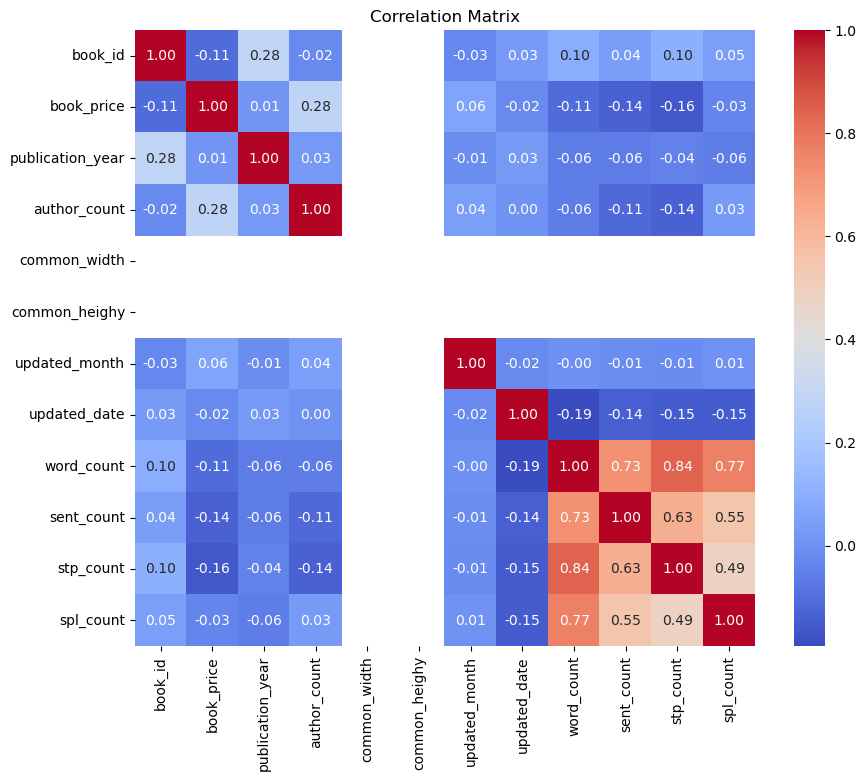

In [32]:
# Correlation analysis
num_features = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize = (10, 8))
sns.heatmap(num_features.corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()

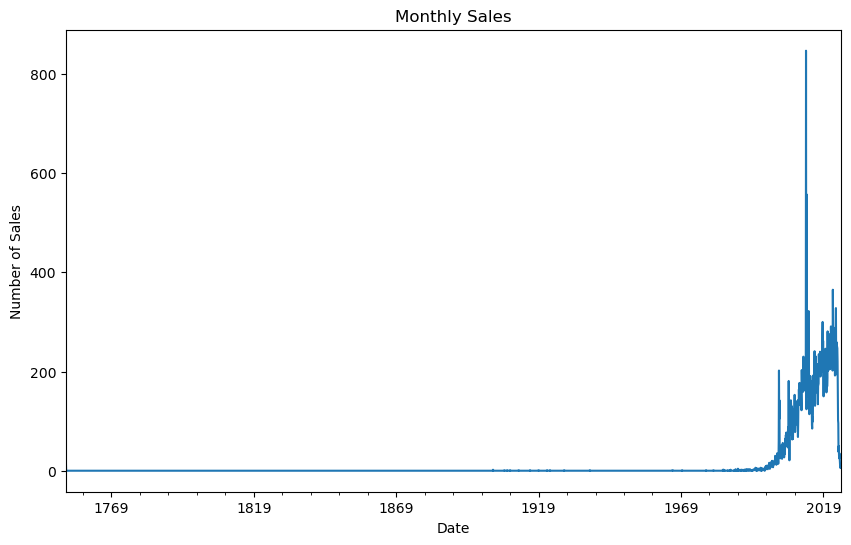

In [33]:
# Time Series Analysis
df['date_of_sale'] = pd.to_datetime(df['date_of_sale'])
df.set_index('date_of_sale', inplace = True)
plt.figure(figsize = (10, 6))
df.resample('M').size().plot()
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.show()

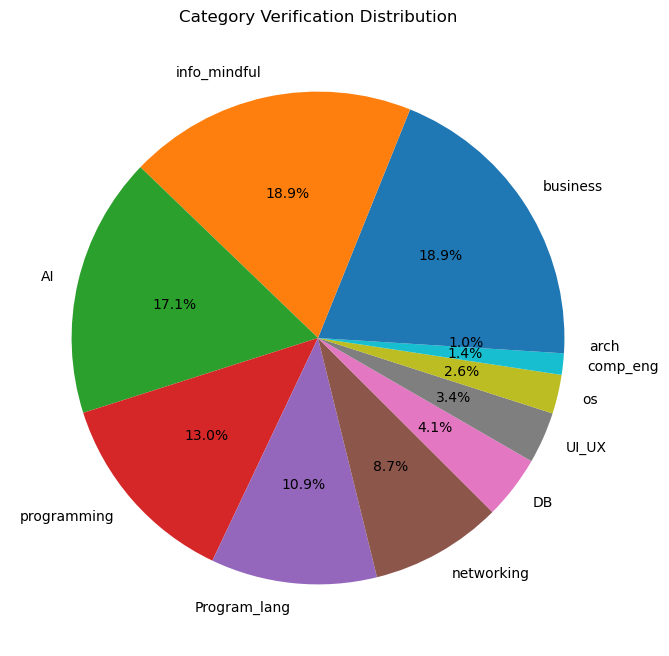

In [34]:
# Pie Charts
plt.figure(figsize = (8, 8))
df['category_verification'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Category Verification Distribution')
plt.ylabel('')
plt.show()

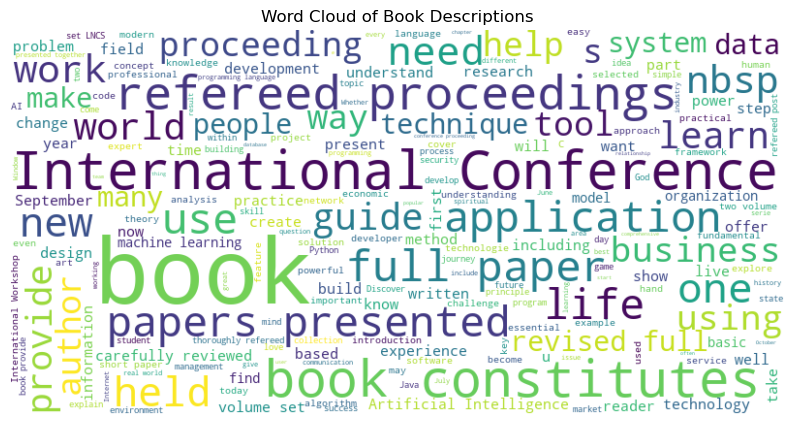

In [35]:
# Word Clouds (for description column)
from wordcloud import WordCloud
text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Word Cloud of Book Descriptions')
plt.axis('off')
plt.show()

In [37]:
# Function to preprocess text and extract words
def preprocess_text(text):
    if isinstance(text, str):
        processed_text = text.lower().split()
        return processed_text
    else:
        return []

In [38]:
# Count the frequency of words for each category and author
c_freq = {}
a_freq = {}

In [39]:
from collections import Counter

In [40]:
for i, r in df.iterrows():
    category = r['category_verification']
    author = r['author_name(s)']
    text = r['Processed_description']
    words = preprocess_text(text)

    # count word frequency for each 'category'
    if category not in c_freq:
        c_freq[category] = Counter()
    c_freq[category] += Counter(words)

    # count word frequency for each 'author'
    if author not in a_freq:
        a_freq[author] = Counter()
    a_freq[author] += Counter(words)

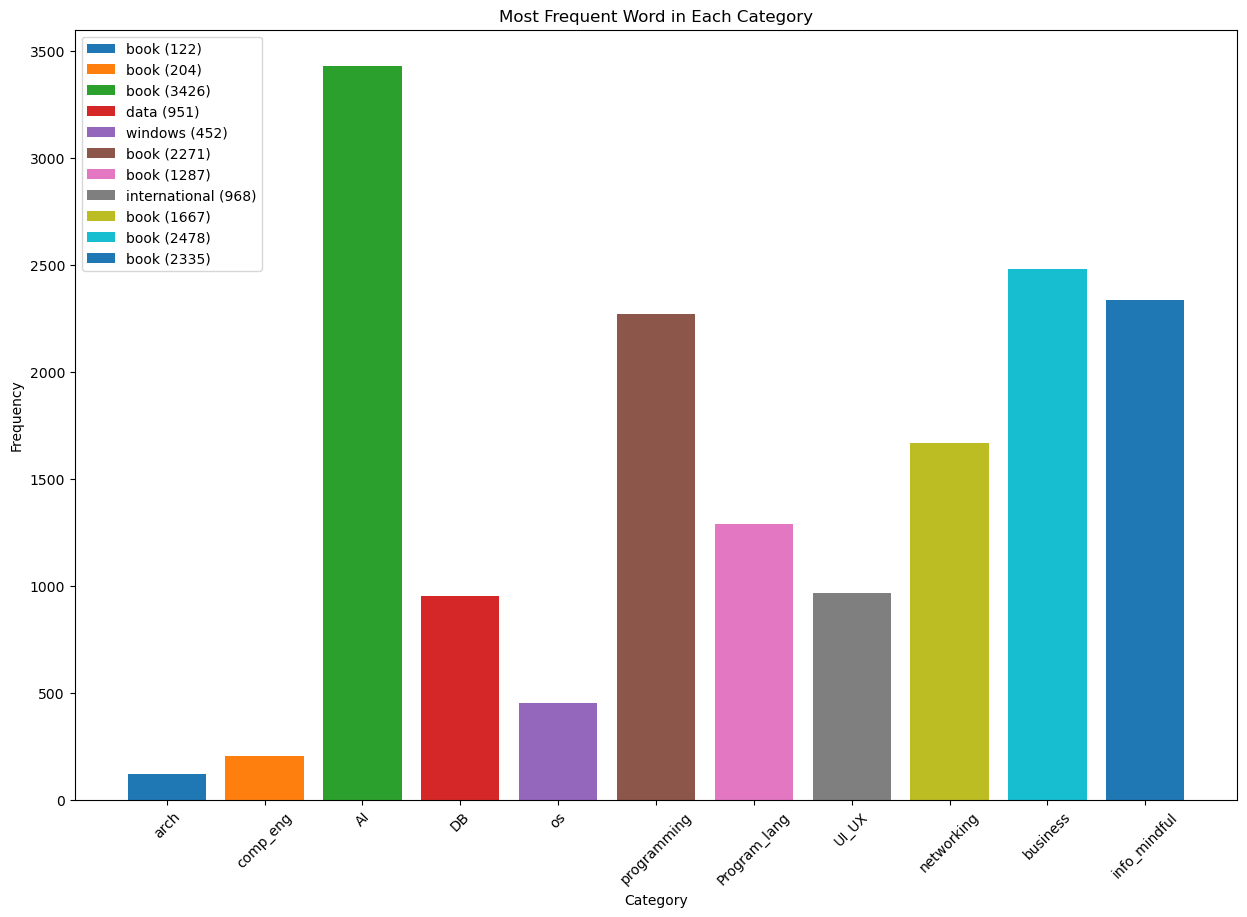

In [41]:
# lets plot the most frequent word in each category
plt.figure(figsize = (15, 10))
for category, word_freq in c_freq.items():
    most_common_word, freq = word_freq.most_common(1)[0]
    plt.bar(category, freq, label = f"{most_common_word} ({freq})")
plt.title('Most Frequent Word in Each Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

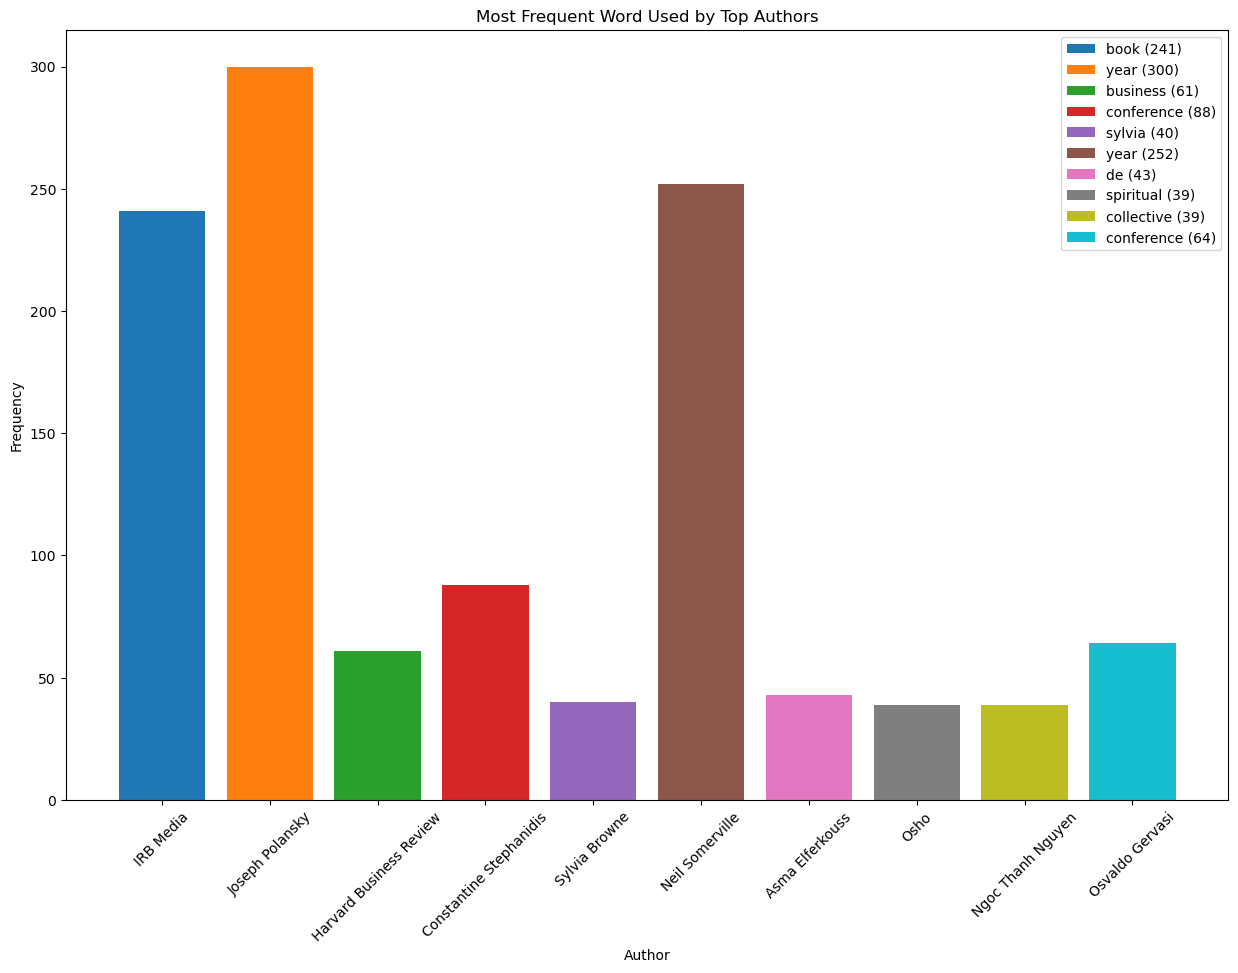

In [42]:
# now, plot the most frequent word used by each author (limiting to top N authors)
plt.figure(figsize = (15, 10))
top_n_authors = 10
for author, word_freq in sorted(a_freq.items(), key = lambda x: sum(x[1].values()), reverse = True)[:top_n_authors]:
    most_common_word, frequency = word_freq.most_common(1)[0]
    plt.bar(author, frequency, label = f"{most_common_word} ({frequency})")
plt.title('Most Frequent Word Used by Top Authors')
plt.xlabel('Author')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

In [232]:
# # Group by category_verification and count the number of occurrences
# cat_counts = df['category_verification'].value_counts().reset_index()
# cat_counts.columns = ['category_verification', 'count']

# # Create the bar plot using Plotly Express
# fig = px.bar(cat_counts, x = 'category_verification', y = 'count',
#              title = 'Count of Books per Category',
#              labels = {'category_verification': 'Category', 'count': 'Count'},
#              color = 'category_verification')
# fig.show()

In [44]:
fig = px.scatter(df, x = 'publication_year', y = 'book_price', title = 'Book Price vs Publication Year',
                 labels = {'publication_year': 'Publication Year', 'book_price': 'Book Price'},
                 color = 'category_verification')
fig.show()

In [45]:
# # select few numerical columns for pairplot
# num_columns = ['book_price', 'publication_year', 'author_count']
# # lets create a pairplot
# sns.pairplot(df, hue = 'category_verification', vars = num_columns)
# plt.show()

In [46]:
from scipy import stats

In [47]:
def qq_plot(data, variable):
    fig = px.scatter(x = np.sort(data[variable]), y = np.sort(np.random.normal(np.mean(data[variable]), np.std(data[variable]), len(data))),
                     labels = {'x': 'Theoretical Quantiles', 'y': 'Sample Quantiles'}, title=f'QQ Plot for {variable}')

In [233]:
# # now, creating scatter plot matrix with QQ plots
# def scatter_plot_matrix_with_qq(df):
#     fig = px.scatter_matrix(df, dimensions = ['book_price', 'publication_year', 'author_count'],
#                             labels = {'book_price': 'Book Price', 'publication_year': 'Publication Year', 'author_count': 'Author Count'})
#     for variable in ['book_price', 'publication_year', 'author_count']:
#         qq_plot(df, variable)
#     fig.update_layout(title = 'Scatter Plot Matrix with QQ Plots')
#     fig.show()
# scatter_plot_matrix_with_qq(df)

In [49]:
# create a 3D scatter plot for the relationship between publication year, book price, and author count
fig = px.scatter_3d(df, x = 'publication_year', y = 'book_price', z = 'author_count', title = '3D Scatter Plot')
fig.show()

In [50]:
df_before_1=df.copy()

<a id="6"></a> 
## word_embedding
#### [back](#0)

In [146]:
df_red1=df_red.copy()

In [147]:
df=df_red1

In [148]:
df = df[['Book_title','sub_title_book','description']]

if we dont want to drop these records, we can impute them with a random value to retain as much information as possible about the book.

Later approaches can also be using pre-trained models and paraphrase the data in hand to generate custom sub titles, or descriptions in the same way

In [149]:
df.fillna('UNK', inplace=True) # UNK for unknown

In [150]:
# merging the features to have a final column for corpus
df['merged_TSD'] = df['Book_title'] + ' ' + df['sub_title_book']+ ' ' + df['description']
df.head()

Book_title  \
0              Software Engineering at Google   
1             The Software Architect Elevator   
2               Software Architecture Metrics   
3  Designing Hexagonal Architecture with Java   
4                    OpenStack for Architects   

                                      sub_title_book  \
0         Lessons Learned from Programming Over Time   
1  Redefining the Architect's Role in the Digital...   
2                                                UNK   
3  Build maintainable and long-lasting applicatio...   
4  Design production-ready private cloud infrastr...   

                                         description  \
0  Today, software engineers need to know not onl...   
1  As the digital economy changes the rules of th...   
2  Software architecture metrics are key to the m...   
3                                                UNK   
4                                                UNK   

                                          merged_TSD  
0  Software Engineering at Google Lessons Learned...  
1  The Software Architect Elevator Redefining the...  
2  Software Architecture Metrics UNK Software arc...  
3  Designing Hexagonal Architecture with Java Bui...  
4  OpenStack for Architects Design production-rea...

In [151]:
# defining functions for each task

def lower_case(text): 
    return text.lower()

def remove_punctuations(text):
    no_punc_text = text.translate(str.maketrans('','',string.punctuation))
    return no_punc_text

def tokenize(text):
    return word_tokenize(text)

def remove_stopwords(text):
    stopset = set(stopwords.words('english'))
    return [word for word in text if word not in stopset]

def lemmatize_text(tokens):
    lemmer = WordNetLemmatizer()
    return [lemmer.lemmatize(word) if lemmer.lemmatize(word) is not None else word for word in tokens]

def remove_special_characters(tokens):
    return [re.sub('[^A-Za-z]+', '', word) for word in tokens]

In [152]:
def preprocess_data(text):
    '''
    To Preprocess the data in one execution.
    
    follows all the disciplines of textual preprocessing in NLP
    '''
    
    text = lower_case(text) # lower the text
    clean_text = remove_punctuations(text) # clean the text 
    tokens = tokenize(text) # tokenization
    clean_tokens = remove_stopwords(tokens) # stopwords removal
    lemmas = lemmatize_text(clean_tokens) # lemmatization 
    final = remove_special_characters(lemmas) # removing special characters
    return ' '.join(final)

In [153]:
preprocess_data(df['merged_TSD'][0]) # testing

'software engineering google lesson learned programming time today  software engineer need know program effectively also develop proper engineering practice make codebase sustainable healthy  book emphasizes difference programming software engineering  software engineer manage living codebase evolves responds '

In [154]:
df['processed_TSD'] = df['merged_TSD'].apply(preprocess_data)

In [155]:
df['processed_TSD'].head()

0    software engineering google lesson learned pro...
1    software architect elevator redefining archite...
2    software architecture metric unk software arch...
3    designing hexagonal architecture java build ma...
4    openstack architect design productionready pri...
Name: processed_TSD, dtype: object

In [156]:
# exporting the processed dataset
# df.to_csv('pre_processed_data.csv',index_label=False)

In [157]:
corpus = df['processed_TSD'].tolist()

In [158]:
tokens = [doc.split() for doc in corpus]

In [159]:
# training the model
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
model = Word2Vec(sentences=tokens,
                 window = 10,
                 size=150,
                 min_count=3,
                iter=50)

2024-04-15 15:51:09,447 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2024-04-15 15:51:09,449 : INFO : collecting all words and their counts
2024-04-15 15:51:09,451 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-04-15 15:51:09,519 : INFO : PROGRESS: at sentence #10000, processed 320611 words, keeping 17658 word types
2024-04-15 15:51:09,581 : INFO : PROGRESS: at sentence #20000, processed 610484 words, keeping 28542 word types
2024-04-15 15:51:09,651 : INFO : PROGRESS: at sentence #30000, processed 927250 words, keeping 39541 word types
2024-04-15 15:51:09,729 : INFO : PROGRESS: at sentence #40000, processed 1251312 words, keeping 52677 word types
2024-04-15 15:51:09,754 : INFO : collected 60463 word types from a corpus of 1363742 raw words and 43055 sentences
2024-04-15 15:51:09,756 : INFO : Loading a fresh vocabulary
2024-04-15 15:51:09,815 : INFO : effective_min_count=3 retains 21996 unique words (36% of original 

In [160]:
# testing the vectorization
# model.wv['python']

In [161]:
model.wv.most_similar('python') # Checking the most similar words

2024-04-15 15:52:22,433 : INFO : precomputing L2-norms of word weight vectors


[('panda', 0.41138654947280884),
 ('chatgpt', 0.40765896439552307),
 ('numpy', 0.4053513705730438),
 ('jupyter', 0.40119224786758423),
 ('wireshark', 0.4001512825489044),
 ('scipy', 0.39815205335617065),
 ('tensorflow', 0.3928127884864807),
 ('coding', 0.38387396931648254),
 ('handson', 0.38261768221855164),
 ('pythonbased', 0.3810875117778778)]

In [162]:
# list of keys (words) that have been vectorized and stored in the model
# model.wv.index2entity 

In [163]:
# creating a dictionary to represent word and vector in K:v format
word_embeddings = {}

for word in model.wv.index2entity:
    vector = model.wv.get_vector(word)
    word_embeddings[word] = vector

In [164]:
# dictionary of word->vector format
# search this dictionary if you want to inspect any words ---> remove this comment later.
# word_embeddings

key points:
- we notice  words like 's'etc. in the embeddings, this occurence happens as the tokenization might recognise 's' as a token itself. in cases like "it's", when we tokenize this, we can see the tokens formed are 'it' and 's'. hence we notice that here
- for words that are in contracted format, we see the tokenization creating 2 seperate tokens. generally we see the contraction words to have not more than 2 words after the apostrophe symbol. 

In [165]:
# inconsistent words that are vectorized in the corpus
[word for word,freq in word_embeddings.items() if len(word)<=2]

['th',
 's',
 'c',
 'de',
 'ai',
 'u',
 'la',
 'gt',
 'lt',
 'ii',
 'io',
 'nt',
 'e',
 'go',
 'd',
 'st',
 'el',
 'll',
 'x',
 'uk',
 'en',
 're',
 'da',
 'le',
 'r',
 'nd',
 'o',
 'fr',
 'rd',
 'p',
 'us',
 'g',
 'wg',
 'un',
 'se',
 'tc',
 'ca',
 'dr',
 've',
 'bi',
 'al',
 'v',
 'zu',
 'su',
 'em',
 'pi',
 'w',
 'j',
 'im',
 'db',
 'z',
 'ee',
 'ip',
 'di',
 'et',
 'f',
 'pc',
 'b',
 'iv',
 'l',
 'cs',
 'ad',
 'il',
 'm',
 'ml',
 'tv',
 'fl',
 'ui',
 'a',
 'um',
 'ci',
 'no',
 'si',
 'nv',
 'au',
 'lo',
 'ux',
 'ms',
 'hr',
 'vb',
 'ki',
 'na',
 'vi',
 'bc',
 'qu',
 'te',
 'n',
 'sa',
 'az',
 'h',
 'i',
 'tu',
 'k',
 'ie',
 'br',
 'in',
 'cc',
 'ce',
 'ny',
 'md',
 'es',
 'qt',
 'pa',
 'du',
 'xp',
 'pr',
 'ed',
 'mo',
 'er',
 'ha',
 'eg',
 'wo',
 'eu',
 'ab',
 'xi',
 'ac',
 'gi',
 'tx',
 'vr',
 'ia',
 'dc',
 'do',
 'hi',
 'ar',
 'so',
 'ic',
 'mi',
 'ss',
 'pp',
 'ho',
 'mr',
 'ao',
 'y',
 'bb',
 'qc',
 'vs',
 'ro',
 'ou',
 't',
 'wa',
 'dy',
 'it',
 'ob',
 'ga',
 'co',
 'mc',
 'o

In [166]:
# saving the word_2_vec model:
model.save('word2vec.model')

2024-04-15 15:52:22,601 : INFO : saving Word2Vec object under word2vec.model, separately None
2024-04-15 15:52:22,601 : INFO : not storing attribute vectors_norm
2024-04-15 15:52:22,604 : INFO : not storing attribute cum_table
2024-04-15 15:52:22,813 : INFO : saved word2vec.model


In [167]:
# let us compute the average of each recordes vector embedding to reduce the in accuracy in dimensionality per title using ht pretrained model
def compute_vect_avg_per_title(title):
    """
    title: str-> converts title to vector form using word2vec model
    """
    words = title.split()
    
    words = [word for word in words if word in model.wv.index2entity]
    if not words:
        return np.zeros(150) 
    
    embeddings = [model.wv[word] for word in words]
    reduced_embedding = np.mean(embeddings, axis=0) # along columns
    
    return reduced_embedding# 1 row 150 cols

In [168]:
# testing
text = 'Software Engineering at Google Whatsapp'.lower() # word whatsapp is not in the word embeddings
vector_of_text = compute_vect_avg_per_title(text)
print(vector_of_text)
print(vector_of_text.shape)

[ 0.26427478 -0.21416567 -1.2924432   1.6265693  -0.67260236  0.76565784
  0.19759183 -0.8987926  -0.06818625  0.17625006 -0.25292778 -0.9251529
 -1.6213813   0.7865137  -1.2954915  -0.05161535  0.5569371  -0.963258
 -0.3873828   0.04757017 -0.52897274  2.8987057  -0.22827074  0.05320334
  0.00755394  0.59103715  0.6422193   0.9765413  -0.33101958  0.5047989
  1.2905567   0.11500756 -0.06086296  0.6104945   1.1516064  -0.3567633
  1.17077    -1.4322742  -0.38339767  1.649664    1.119287    0.11004645
 -0.72198534 -0.12255478  0.33640757 -0.43039644  0.0331381   0.6859591
  0.2899234   0.31656513 -0.18292838 -0.2602296   2.6118197   0.64709055
 -0.6723843   0.5912454  -1.3401253   0.7301951   0.65515554  1.1844562
 -0.7654231   0.00981867 -0.24957594  0.55972534 -0.08047599 -0.07401597
  0.5328069  -0.1723248   0.56214    -1.1749432  -0.8622466  -1.574013
 -0.6561987  -0.41354024  0.4243729   1.0545555  -1.6667001   2.0284185
  0.37030184 -0.35240042  1.0039208   0.2760185  -1.9179747  

In [169]:
df['vectorized_TSD'] = df['processed_TSD'].apply(compute_vect_avg_per_title)

In [170]:
df.head()

Book_title  \
0              Software Engineering at Google   
1             The Software Architect Elevator   
2               Software Architecture Metrics   
3  Designing Hexagonal Architecture with Java   
4                    OpenStack for Architects   

                                      sub_title_book  \
0         Lessons Learned from Programming Over Time   
1  Redefining the Architect's Role in the Digital...   
2                                                UNK   
3  Build maintainable and long-lasting applicatio...   
4  Design production-ready private cloud infrastr...   

                                         description  \
0  Today, software engineers need to know not onl...   
1  As the digital economy changes the rules of th...   
2  Software architecture metrics are key to the m...   
3                                                UNK   
4                                                UNK   

                                          merged_TSD  \
0  Software Engineering at Google Lessons Learned...   
1  The Software Architect Elevator Redefining the...   
2  Software Architecture Metrics UNK Software arc...   
3  Designing Hexagonal Architecture with Java Bui...   
4  OpenStack for Architects Design production-rea...   

                                       processed_TSD  \
0  software engineering google lesson learned pro...   
1  software architect elevator redefining archite...   
2  software architecture metric unk software arch...   
3  designing hexagonal architecture java build ma...   
4  openstack architect design productionready pri...   

                                      vectorized_TSD  
0  [-0.60055375, -0.9272838, 0.30130354, 1.358529...  
1  [-0.9404088, -0.40585, -0.105491936, 0.4307676...  
2  [-0.13573988, -0.7749573, 0.0019663363, 0.8996...  
3  [0.21174864, -0.9958126, 0.5385038, 1.6474494,...  
4  [0.754765, -0.27140892, 0.91941524, 0.9657209,...

In [171]:
def visualize_embeddings(model, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([model[word] for word in words])
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    df_viz = pd.DataFrame({
        'word': words,
        'x': two_d_embeddings[:, 0],
        'y': two_d_embeddings[:, 1]
    })

    fig = px.scatter(df_viz, x='x', y='y', text='word', title='Word Embeddings Visualization')
    fig.update_traces(textposition='bottom right')
    fig.show()


In [172]:
# visually checking for the correctness of the word embeddings
words = model.wv.index2entity
visualize_embeddings(model.wv, words[:150]) # visualizing 150 words only, you know why only 150 XD

<a id="7"></a> 
## Approach#1: K-Nearest Neighbours (Baseline Model)
#### [back](#0)

## EXPERIMENT-01

**Model used**: KNEAREST NEIGHBOURS(With Cosine Distance metric for optimal distance judgement)

**Vectorizer used**: Word2Vec (static word embedding model)

## EXPERIMENT-02
**Model used**: KNEAREST NEIGHBOURS(With Cosine Distance metric for optimal distance judgement)

**Vectorizer used**: Universal-Sentence-Encoder (contexulised word_embeddings model)


The Approach we used for our base line model is not a model technique strictly but a method of extracting the best matching datapoints based on **'Cosine Similarity'**

In our extensive research for our product, we came accross a conclusion that, when dealing with vectors of high dimensionality it is best to get a distance based match between your target vector and its corresponding resultant predictions.

In this case, we using the `kneighbours()` method from `NearestNeighbours model` (algorithm) which retrieves the closest neighbours to our target vector(user prompt) based on the cosine metric between each other.
the best cosine scored vector is the best predicted book by the model.

This idea is not the best practice but defenitely serves as a good fit for a base line model, In our further approaches we use cosine similarity but with a added setting of supervised or unsupervised learning to discuss the best possible approach for our product.

In [173]:
# function to preprocess and convert the user prompt to vector
def get_vec(user_prompt):
    
    """
    This cleans and converts the user prompts to its vector representation, each word in the prompt is searched for in the word2vec model. If the word is present,
    its respective vector is extracted. and if the word is not present, we use an array of zeros and the resultant vector is the average of the collection of the vectors
    to have an ever representation of the vectors.
    """
    user_prompt = lower_case(user_prompt) # lower the text
    clean_text = remove_punctuations(user_prompt) # clean the text 
    tokens = tokenize(clean_text) # tokenization
    clean_tokens = remove_stopwords(tokens) # stopwords removal
    lemmas = lemmatize_text(clean_tokens) # lemmatization 
    final = remove_special_characters(lemmas) # removing special characters
    words = [word for word in final if word in model.wv.index2entity] # filtering words that are in the model, rest are stored as zeros with same dim
    if not words:
        return np.zeros(150) 
    
    embeddings = [model.wv[word] for word in words]
    reduced_embedding = np.mean(embeddings, axis=0) # along columns
    
    return reduced_embedding # 1 row 150 cols

## Experimentation -01 Implementation

In [174]:
from sklearn.neighbors import NearestNeighbors

In [175]:
nn_model = NearestNeighbors(n_neighbors=10, metric='cosine')

In [176]:
X = []
for array in df['vectorized_TSD']:
    X.append(array)

In [177]:
# training the model 
nn_model.fit(X)

NearestNeighbors(metric='cosine', n_neighbors=10)

## Experimentation -02 Implementation

In [178]:
# contexulised word_embeddings model

In [179]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the Universal Sentence Encoder module
use_module = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


In [180]:
def cont_model_embeddings(text_data):
    embeddings = use_module(text_data)
    return embeddings.numpy()


In [181]:
text_embeddings = cont_model_embeddings(df['processed_TSD'])
df['use_embeddings'] = list(text_embeddings)


model_u = NearestNeighbors(n_neighbors=10, metric='cosine')
model_u.fit(text_embeddings)


NearestNeighbors(metric='cosine', n_neighbors=10)

In [182]:
def recommend_books(user_prompt, model, df,word_em=None):
    #book_titles,#words, #threshold -> commenting out, these are parameters to consider too, experimenting

    """
    Takes the user prompt, converts it to vector and fits it to the model
    
    Params: 
    User_prompt: str -> the text user enters
    nn_model: model used for prediction of user prompt
    word_list = list -> list of words that are used in model= word2vec
    recommended_words-> list: list of words that are most similar to the 
    #book_titles:list-> list of book titles
    threshold-> accepted threshold for titles (used for getting the titles which has most words from the recommended words which are above the threshold)
    df -> To retrieve the titles recommended by the model
    """    
    if word_em:
        user_prompt_embedding=cont_model_embeddings([user_prompt])
    else:
    # converting the user prompt to a vector
        user_prompt_embedding = get_vec(user_prompt).reshape(1,150) # here reshape is required!


    # nearest neighbours- feeding the vectored prompt
    distances, indices = model.kneighbors(user_prompt_embedding)
    

    # Retrieve the book titles that corresponding to the user prompt as per nearest neigbour (using cosine similarity)
    recommended_titles = [df.Book_title.iloc[i] for i in indices[0]]
        

    return recommended_titles

## Experimentation- 01 Evaluation

In [183]:
# testing -1
user_prompt = 'hey i am looking for a book to learn python'
recommend_books(user_prompt, model= nn_model,df= df)

['Python for Professionals',
 'Python for Everyone',
 'Head First Python',
 'Basic Python for Data Management, Finance, and Marketing',
 'Quick Python 3',
 'Python Without Fear',
 'PYTHON CODING',
 'Make Python Talk',
 'Make Your Own Python Text Adventure',
 'Python for Teenagers']

In [184]:
# testing -2 
user_prompt = 'I love spirituality, can you recommend me a book for meditation'
recommend_books(user_prompt, nn_model, df)

['Aspects of Meditation Book 4',
 'Aspects of Meditation Book 2',
 'The Meditation Bible',
 'Meditations of the Heart',
 'Aspects of Meditation Book 3',
 'The Way to Love',
 'The Mystery and Magic of Love',
 'Meditation Techniques For Beginners: The Daily Meditation Ritual Lifestyle: The Best Kept Secrets about Meditation Techniques, Meditation Exercises, Meditation Transcendental & Meditation Motivation',
 'The Joy of Meditating',
 'Daily Medicine']

In [185]:
# testing -3
# this prompt asks for the type of book which is not in the data we fed the model with.
user_prompt = 'I want to learn math for my exam, suggest me some good books for math'
recommend_books(user_prompt, nn_model, df)

['Math Adventures with Python',
 'Python for Teenagers',
 'Microsoft Excel 2019 Programming Pocket Primer',
 'Microsoft Excel 2019 Programming Pocket Primer',
 'Doing Math with Python',
 'Quick JavaScript',
 'Learn You a Haskell for Great Good!',
 'Quick Recursion',
 'Think Perl 6',
 'Machine Learning with Python for Everyone']

In [186]:
# testing -4
user_prompt = 'How to learn investing in market'
recommend_books(user_prompt, nn_model, df)

['Volatile Markets Made Easy',
 'Trading For Dummies',
 'The Neatest Little Guide to Stock Market Investing',
 'The Daily Telegraph Guide to Investing',
 'Clever Girl Finance',
 'Profiting With Forex',
 'Building Wealth in the Stock Market',
 'Stocks for the Long Run: The Definitive Guide to Financial Market Returns & Long-Term Investment Strategies, Sixth Edition',
 'Stock Investing For Dummies',
 'Master Trading']

## Experimentation- 02 Evaluation

In [187]:
# testing -1
user_prompt = 'hey i am looking for a book to learn python'
recommend_books(user_prompt, model= model_u,df= df,word_em=True)

['A Beginners Guide to Python 3 Programming',
 'Quick Python 3',
 'Learn Python Programming, 3rd edition',
 'Learning Professional Python',
 'Get Programming',
 'Python Fundamentals',
 'PYTHON FOR BEGINNERS',
 'Python Crash Course, 2nd Edition',
 'Python for Beginners',
 'Learn Python the Hard Way']

In [188]:
# testing -2 
user_prompt = 'I love spirituality, can you recommend me a book for meditation'
recommend_books(user_prompt, model= model_u,df= df,word_em=True)

['Self-Awareness and Meditation',
 'The Meditation Bible',
 'The Joy of Meditating',
 'The Wondrous Journey',
 'Aspects of Meditation Book 4',
 'The Mindful Medium: A Practical Guide to Spirituality',
 'Discover Meditation & Mindfulness',
 'Aspects of Meditation Book 2',
 'A Technique for Meditation',
 'What is Meditation?']

In [189]:
# testing -3
# this prompt asks for the type of book which is not in the data we fed the model with.
user_prompt = 'I want to learn math for my exam, suggest me some good books for math'
recommend_books(user_prompt, model= model_u,df= df,word_em=True)

['Advanced Mathematical Economics',
 'Discrete Mathematics and Applications',
 'Algorithmic Information Theory',
 'Statistical Learning with Math and R',
 'Sparse Estimation with Math and R',
 'Mathematics, Computer Science and Logic - A Never Ending Story',
 'An Introduction to Mathematical Analysis for Economic Theory and Econometrics',
 'Algorithmic Mathematics',
 'Mathematics Education for a New Era',
 'Pearls of Discrete Mathematics']

In [190]:
# testing -4
user_prompt = 'How to learn investing in market'
recommend_books(user_prompt, model= model_u,df= df,word_em=True)

['Make Your Money Work for You',
 'How To Invest Today',
 'The Neatest Little Guide to Stock Market Investing',
 'Getting Started with Forex Trading Using Python',
 'Getting Started with Forex Trading Using Python',
 'The Daily Telegraph Guide to Investing',
 'Master Trading',
 'How to Invest in Real Estate',
 'How to Day Trade for a Living - Create Monthly Income from Day Trading',
 'Educated REIT Investing']

In [191]:
## dimention sparsing is not working

In [192]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=100) 
svd_model.fit(X)

TruncatedSVD(n_components=100)

In [193]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_books_svd(user_prompt, model, df):
    user_prompt_embedding = get_vec(user_prompt).reshape(1, 150)
    user_embedding = model.transform(user_prompt_embedding)
    svd_components = model.components_
    cosine_similarities = cosine_similarity(user_embedding, svd_components[:, :100])
    print(cosine_similarities.argsort())
    top_indices = cosine_similarities.argsort()[0][::-1][:10]
    recommended_titles_svd = df.iloc[top_indices]['Book_title'].tolist()
    
    return recommended_titles_svd


In [194]:
# testing -1
user_prompt = 'hey i am looking for a book to learn python'
recommend_books_svd(user_prompt, model= svd_model,df= df)

[[44  3 60 46 72 17 25 79 93  0  6 14 16 52 35 19 63 82 49 45 80  1 50 28
  77 91 34 84 47 86 11 20 59 29  7 22 39 12 13 75  4 26 38 53 70 95 18  2
  48 90 58 56 15 74 98 69 83 85 96 81 64 27 30 24 89 31 41 87 62 76 78 55
   8 94 32 54 99 10 36 21 67 73 61  9 97  5 68 23 92 33 37 71 66 88 42 51
  40 43 65 57]]


['Heterogeneous Computing with OpenCL 2.0',
 'Building CI/CD Systems Using Tekton',
 'Becoming a Salesforce Certified Technical Architect',
 'Cloud Foundry: The Definitive Guide',
 'Microsoft IIS 10.0 Cookbook',
 'Hands-On Domain-Driven Design with .NET Core',
 'Fundamentals of Computer Organization and Architecture',
 '50 Kubernetes Concepts Every DevOps Engineer Should Know',
 'HashiCorp Packer in Production',
 'Systems Engineering Demystified']

In [195]:
df_before_2=df.copy()

<a id="8"></a> 
# APPROACH#2 - Support Vector Classifier (SUPERVISED SETTING)
#### [back](#0)

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import logging
warnings.filterwarnings('ignore')

from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string
from sklearn.manifold import TSNE
import tqdm
import nltk
from nltk.tokenize import sent_tokenize
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

**Model used**: Support Vector Classifier (Support Vector Machine) 

**Vectorizer used**: Word2Vec (static word embedding model)


In this approach, we will try to induce **Supervised Learning** on our data, considering vectorised `title` + `Sub_title` + `Description` to be the Feature set and `true_labels` to be the Target feature. 

In this context this turns out to be a **Multi-class Classification** use case where the number of classes are the unique count of true labels. In our case, 11 classes.

# WE dont have to import csv again, doing it to run things smoothly. if above code is executed, dont need to run this code again.

In [101]:
# loading the pretrained model
model = Word2Vec.load('word2vec.model')

2024-04-15 15:34:31,836 : INFO : loading Word2Vec object from word2vec.model
2024-04-15 15:34:32,114 : INFO : loading wv recursively from word2vec.model.wv.* with mmap=None
2024-04-15 15:34:32,115 : INFO : setting ignored attribute vectors_norm to None
2024-04-15 15:34:32,116 : INFO : loading vocabulary recursively from word2vec.model.vocabulary.* with mmap=None
2024-04-15 15:34:32,116 : INFO : loading trainables recursively from word2vec.model.trainables.* with mmap=None
2024-04-15 15:34:32,117 : INFO : setting ignored attribute cum_table to None
2024-04-15 15:34:32,119 : INFO : loaded word2vec.model


In [105]:
# let us compute the average of each recordes vector embedding to reduce the in accuracy in dimensionality per title using ht pretrained model
def compute_vect_avg_per_title(title):
    """
    title: str-> converts title to vector form using word2vec model
    """
    words = title.split()
    
    words = [word for word in words if word in model.wv.index2entity]
    if not words:
        return np.zeros(150) 
    
    embeddings = [model.wv[word] for word in words]
    reduced_embedding = np.mean(embeddings, axis=0) # along columns
    
    return reduced_embedding# 1 row 150 cols

In [106]:
df = pd.read_csv('pre_processed_data.csv')

In [107]:
# generating VECTORIZED_TSD using the saved model -> word2vec model
df['vectorized_TSD'] = df['processed_TSD'].apply(compute_vect_avg_per_title)

In [108]:
df.head()

Book_title  \
0              Software Engineering at Google   
1             The Software Architect Elevator   
2               Software Architecture Metrics   
3  Designing Hexagonal Architecture with Java   
4                    OpenStack for Architects   

                                      sub_title_book  \
0         Lessons Learned from Programming Over Time   
1  Redefining the Architect's Role in the Digital...   
2                                                UNK   
3  Build maintainable and long-lasting applicatio...   
4  Design production-ready private cloud infrastr...   

                                         description  \
0  Today, software engineers need to know not onl...   
1  As the digital economy changes the rules of th...   
2  Software architecture metrics are key to the m...   
3                                                UNK   
4                                                UNK   

                                          merged_TSD  \
0  Software Engineering at Google Lessons Learned...   
1  The Software Architect Elevator Redefining the...   
2  Software Architecture Metrics UNK Software arc...   
3  Designing Hexagonal Architecture with Java Bui...   
4  OpenStack for Architects Design production-rea...   

                                       processed_TSD  \
0  software engineering google lesson learned pro...   
1  software architect elevator redefining archite...   
2  software architecture metric unk software arch...   
3  designing hexagonal architecture java build ma...   
4  openstack architect design productionready pri...   

                                      vectorized_TSD  
0  [-0.11599839, -0.53284484, -0.47462627, 0.7253...  
1  [-0.9073937, -0.33654463, -0.8294513, 0.305376...  
2  [-0.18172348, -0.8293861, -0.82066953, 0.01367...  
3  [0.07114089, -0.5315582, -0.58109164, 0.556484...  
4  [-0.11425015, 0.12985949, -1.8090506, -0.01692...

In [109]:
# extracting the true_labels from the main dataset (originally scraped dataset)
df_original = pd.read_csv('scrapped_data_version_1_comp_business_mind.csv')
labels = df_original.category_verification
df['true_labels'] = labels

In [110]:
df.head()

Book_title  \
0              Software Engineering at Google   
1             The Software Architect Elevator   
2               Software Architecture Metrics   
3  Designing Hexagonal Architecture with Java   
4                    OpenStack for Architects   

                                      sub_title_book  \
0         Lessons Learned from Programming Over Time   
1  Redefining the Architect's Role in the Digital...   
2                                                UNK   
3  Build maintainable and long-lasting applicatio...   
4  Design production-ready private cloud infrastr...   

                                         description  \
0  Today, software engineers need to know not onl...   
1  As the digital economy changes the rules of th...   
2  Software architecture metrics are key to the m...   
3                                                UNK   
4                                                UNK   

                                          merged_TSD  \
0  Software Engineering at Google Lessons Learned...   
1  The Software Architect Elevator Redefining the...   
2  Software Architecture Metrics UNK Software arc...   
3  Designing Hexagonal Architecture with Java Bui...   
4  OpenStack for Architects Design production-rea...   

                                       processed_TSD  \
0  software engineering google lesson learned pro...   
1  software architect elevator redefining archite...   
2  software architecture metric unk software arch...   
3  designing hexagonal architecture java build ma...   
4  openstack architect design productionready pri...   

                                      vectorized_TSD true_labels  
0  [-0.11599839, -0.53284484, -0.47462627, 0.7253...        arch  
1  [-0.9073937, -0.33654463, -0.8294513, 0.305376...        arch  
2  [-0.18172348, -0.8293861, -0.82066953, 0.01367...        arch  
3  [0.07114089, -0.5315582, -0.58109164, 0.556484...        arch  
4  [-0.11425015, 0.12985949, -1.8090506, -0.01692...        arch

In [111]:
# pre-processing the true_labels column - label encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score

In [112]:
encoder = LabelEncoder()

In [113]:
encoded_labels = encoder.fit_transform(df['true_labels'])

In [114]:
# Checking the encoding
encoded_labels[:4]

array([4, 4, 4, 4])

In [115]:
# encoded labels column
df['encoded_labels'] = encoded_labels

In [116]:
df.head()

Book_title  \
0              Software Engineering at Google   
1             The Software Architect Elevator   
2               Software Architecture Metrics   
3  Designing Hexagonal Architecture with Java   
4                    OpenStack for Architects   

                                      sub_title_book  \
0         Lessons Learned from Programming Over Time   
1  Redefining the Architect's Role in the Digital...   
2                                                UNK   
3  Build maintainable and long-lasting applicatio...   
4  Design production-ready private cloud infrastr...   

                                         description  \
0  Today, software engineers need to know not onl...   
1  As the digital economy changes the rules of th...   
2  Software architecture metrics are key to the m...   
3                                                UNK   
4                                                UNK   

                                          merged_TSD  \
0  Software Engineering at Google Lessons Learned...   
1  The Software Architect Elevator Redefining the...   
2  Software Architecture Metrics UNK Software arc...   
3  Designing Hexagonal Architecture with Java Bui...   
4  OpenStack for Architects Design production-rea...   

                                       processed_TSD  \
0  software engineering google lesson learned pro...   
1  software architect elevator redefining archite...   
2  software architecture metric unk software arch...   
3  designing hexagonal architecture java build ma...   
4  openstack architect design productionready pri...   

                                      vectorized_TSD true_labels  \
0  [-0.11599839, -0.53284484, -0.47462627, 0.7253...        arch   
1  [-0.9073937, -0.33654463, -0.8294513, 0.305376...        arch   
2  [-0.18172348, -0.8293861, -0.82066953, 0.01367...        arch   
3  [0.07114089, -0.5315582, -0.58109164, 0.556484...        arch   
4  [-0.11425015, 0.12985949, -1.8090506, -0.01692...        arch   

   encoded_labels  
0               4  
1               4  
2               4  
3               4  
4               4

In [117]:
# extracting independent and dependent features
X = [x for x in df['vectorized_TSD']]
y = df['encoded_labels']

In [118]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42, stratify=y)

In [119]:
# importing SVC
from sklearn.svm import SVC
# initial instance with fundamental parameters
model_SVC = SVC(verbose= 2,decision_function_shape= 'ovr', random_state= True)

In [120]:
model_SVC.fit(X_train,y_train)

[LibSVM]

SVC(random_state=True, verbose=2)

In [121]:
def calculate_scores(model, X_tr, X_ts, y_tr, y_ts):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print('The Accuracy of the Model for trainig set is: ',round(accuracy_score(y_train, y_pred_train),4))
    #print('The Precision of the Model for trainig set is: ',round(precision_score(y_train, y_pred_train),4))
    print('The Classification report for training set:')
    print(classification_report(y_train, y_pred_train))
    
    
    print('The Accuracy of the Model for test set is: ',round(accuracy_score(y_test, y_pred_test),4))
   # print('The Precision of the Model for test set is: ',round(precision_score(y_test, y_pred_test),4))
    print('The Classification report for test set:')
    print(classification_report(y_test, y_pred_test))
    
    # confusion matrix
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)
    
    fig, ax = plt.subplots(2,1, figsize = (7, 10))
    
    sns.heatmap(train_cm, fmt = 'd', cmap = 'Oranges', ax = ax[0], annot= True)
    ax[0].set_title('Confusion Matrix (Train set): ')
    ax[0].set_xlabel('Predicted Labels')
    ax[0].set_ylabel('True Labels')
    
    
    sns.heatmap(test_cm, fmt = 'd', cmap = 'Blues', ax = ax[1], annot= True)
    ax[1].set_title('Confusion Matrix (Test set): ')
    ax[1].set_xlabel('Predicted Labels')
    ax[1].set_ylabel('True Labels')

In [122]:
calculate_scores(model = model_SVC, X_tr= X_train, X_ts= X_test,y_tr= y_train,y_ts= y_test)

The Accuracy of the Model for trainig set is:  0.8162
The Classification report for training set:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      5117
           1       0.79      0.66      0.72      1233
           2       0.69      0.77      0.72      3240
           3       0.89      0.71      0.79      1004
           4       0.77      0.18      0.30       294
           5       0.93      0.95      0.94      5593
           6       0.67      0.35      0.46       837
           7       0.96      0.98      0.97      5593
           8       0.75      0.77      0.76      2579
           9       0.73      0.63      0.68       759
          10       0.70      0.63      0.67      3889

    accuracy                           0.82     30138
   macro avg       0.79      0.68      0.71     30138
weighted avg       0.81      0.82      0.81     30138

The Accuracy of the Model for test set is:  0.7666
The Classification report for test set

We see that the train accuracy is about 81% and test accuracy is about 76%, suggesting some over-fit of data.

Although an overfit, this is still considered a pretty decent model.

Let us try to improve the model using Hyper Parameter Tuning

We are going to implement a different, much quicker and easy on the computational power Hyper Parameter tuning API called **Halving Random Search**

`HalvingGridSearch` and `HalvingRandomSearch` take a different approach called successive halving. 

HGS is like a competition among all candidates (hyperparameter combinations). In the first iteration, HGS trains all candidates on a small proportion of the training data. In the next iteration, only the candidates which performed best are chosen and they will be given more resources to compete. So, with each passing iteration, the ‘surviving’ candidates will be given more and more resources (training samples) until the best set of hyperparameters are left standing.

This has been known to increase the overall performance in roughly 10% of the time consumed by `GridSearchCV` or `RandomizedSearchCV`

In [123]:
# using Halving Grid Search
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

**Because of Computational Limitations we are not executing this block of code again. the records to initial execution along with metrics and results have been provided in the Report. Kindly Excuse Us.**

In [124]:
# param_grid_svc = {
#     'C': [0.1, 1, 10, 50, 100],  # Regularization parameter
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel choice
#     'degree': [2, 3, 4, 5],  # Degree of the polynomial kernel (only for 'poly' kernel)
#     'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
# }

In [125]:
# halving_grid_search = HalvingGridSearchCV(estimator=SVC(random_state= 42),
#                                           param_grid= param_grid_svc,
#                                           cv=10,
#                                           factor= 3, 
#                                           scoring = 'accuracy',
#                                           return_train_score = True,
#                                           n_jobs = -1
#                                          )

In [126]:
# %timeit
# halving_grid_search.fit(X_train, y_train)

In [127]:
# halving_grid_search.best_params_

In [128]:
# results
# df_results_HGS = pd.DataFrame(halving_grid_search.cv_results_)
# df_results_HGS.to_csv('Results_HGS.csv',index_label= False)

In [129]:
# loading the dataset containing the results of Halving grid search algorithm (detailed informtion)
df_results_HGS = pd.read_csv('Results_HGS.csv')

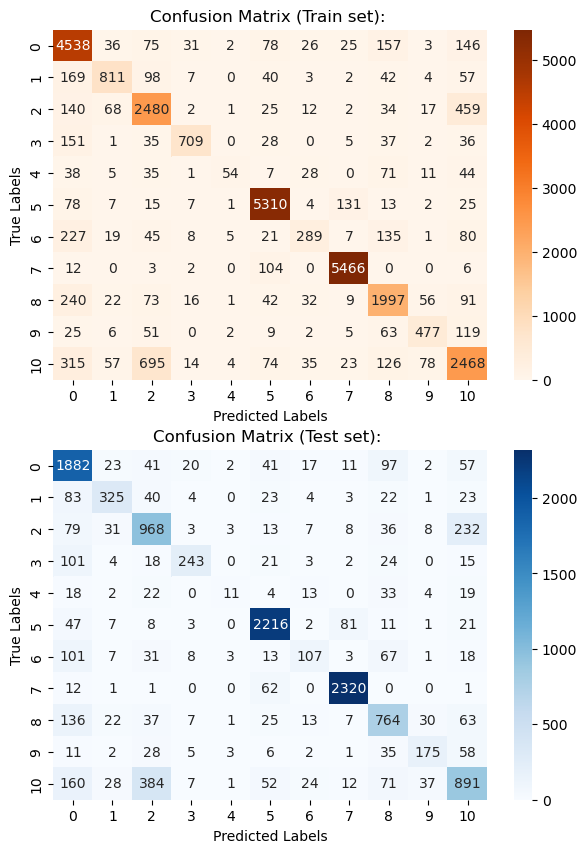

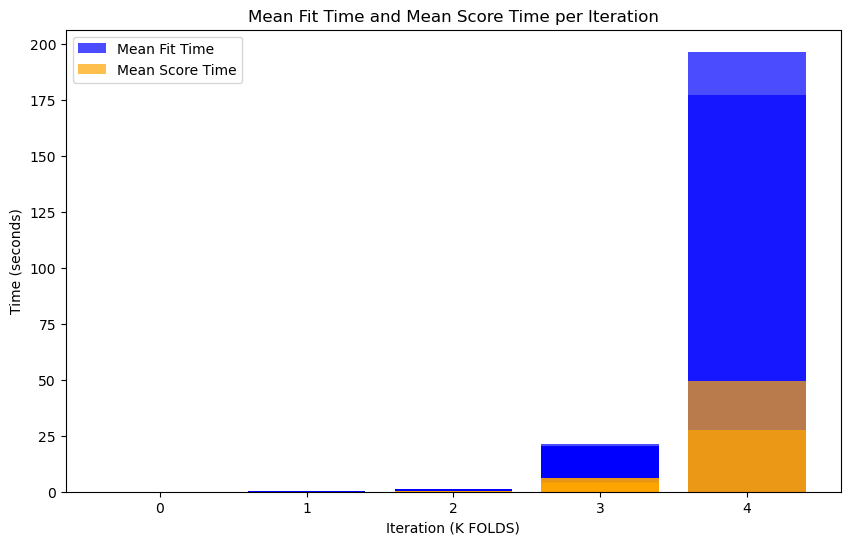

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df_results_HGS['iter'], df_results_HGS['mean_fit_time'], label='Mean Fit Time', color='blue', alpha=0.7)
plt.bar(df_results_HGS['iter'], df_results_HGS['mean_score_time'], label='Mean Score Time', color='orange', alpha=0.7)
plt.xlabel('Iteration (K FOLDS)')
plt.ylabel('Time (seconds)')
plt.title('Mean Fit Time and Mean Score Time per Iteration')
plt.legend()
plt.show()

As the algorithm works with successive elimination of weak parameters, the initial fit and score time is seen to be close to 0, for each fold the time increases gradually.
spiking at the 4th iteration with the best parameters being deduced, This depicted in the above bar chart

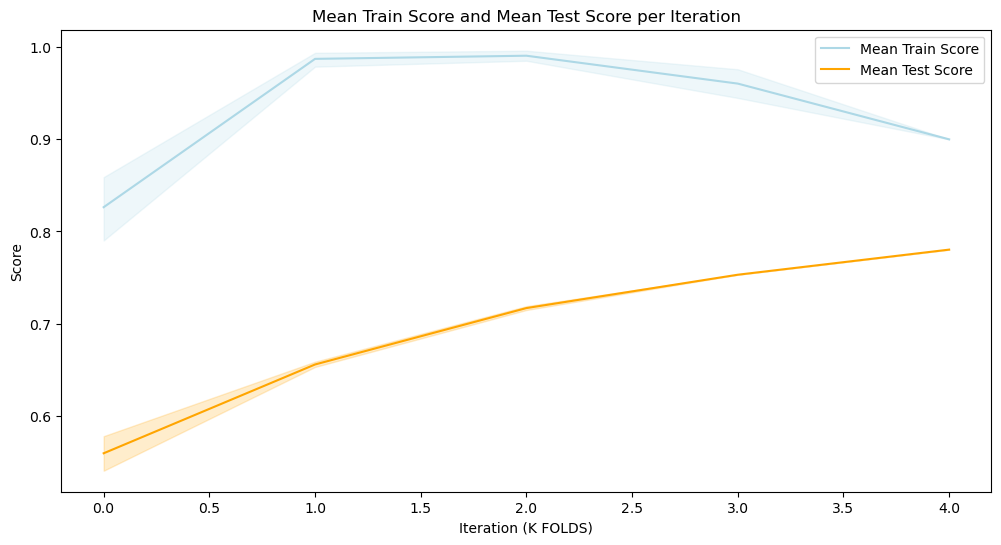

In [131]:
plt.figure(figsize=(12,6))
sns.lineplot(x = df_results_HGS.iter, y = df_results_HGS.mean_train_score, markers= '.', color = 'lightblue',label='Mean Train Score')
sns.lineplot(x = df_results_HGS.iter, y = df_results_HGS.mean_test_score, markers= '.', color = 'orange',label='Mean Test Score')
plt.xlabel('Iteration (K FOLDS)')
plt.ylabel('Score')
plt.title('Mean Train Score and Mean Test Score per Iteration')
plt.legend()
plt.show()

The above line plot suggests that:
- the train score was initially at a very good point, had a steady spike and then lowered to a central space. The steady spike can say that the model was over generalizing on the data and was almost as good as getting 100% accurate predictions which is considered overfit. in the later stages the line saw a negative trend showing significant poor performance on the final iterations on unseen or seen data.
- The test score was terrible and gradually increased with each iteration. we notice no spike in the test score line suggesting that the learning rate of the model was gradual and steady resulting in no sudden over generalization of the data.
- both the points met a close space to each other, where train score line was slightly above test score line, suggesting that the best parameter model slightly overfits. we can confirm this later based on the predictions made using best_params_ estimator
    

In [132]:
SVC_RS_model = SVC(C= 10, degree= 5, gamma= 'auto', kernel='rbf', random_state= 42, decision_function_shape= 'ovr')

In [133]:
SVC_RS_model.fit(X_train, y_train)

SVC(C=10, degree=5, gamma='auto', random_state=42)

In [134]:
calculate_scores(model = SVC_RS_model, X_tr= X_train, X_ts= X_test,y_tr= y_train,y_ts= y_test)

The Accuracy of the Model for trainig set is:  0.8972
The Classification report for training set:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      5117
           1       0.87      0.84      0.85      1233
           2       0.79      0.86      0.82      3240
           3       0.94      0.85      0.90      1004
           4       0.89      0.61      0.72       294
           5       0.96      0.97      0.97      5593
           6       0.87      0.76      0.81       837
           7       0.98      0.99      0.98      5593
           8       0.86      0.87      0.87      2579
           9       0.85      0.79      0.82       759
          10       0.83      0.77      0.80      3889

    accuracy                           0.90     30138
   macro avg       0.88      0.84      0.86     30138
weighted avg       0.90      0.90      0.90     30138

The Accuracy of the Model for test set is:  0.778
The Classification report for test set:

**Judging purely on Accuracy, the model with best parameters after halving Grid search CV did not perform good. instead was even worse than the original fundamental model.**

- we notice that Accuracy on train set vs test set has a difference of about 10%. we consider this to be an unstable model by this difference.

Reasons to this could be:
- **Failure of Havling Strategy**: It is highly possible that, some parameters that did not perform on the initial dataset with lower tendency of records could have performed better eventually with larger records being exposed to it. Such records could have been discarded by the `HalvingGridSearchCV` which could have resulted in such a result
- **Insufficient exhaustion of hyper-parameters**: There is a chance that maybe not all hyper parameters were used, and the once used could have had better values if exhausted more. this might take time and computationly be very challenging. but there is a possibility of having better model performance (not always) when exhaustion is done to the extreme.
- **Data Quality**: Maybe the data being used is not in its best representation, we are using word embeddings of words seen in the corpus which is of 150 dimensions. it is highly possible that either 150 dimensions are not representing enough data about the word in its natural form, or is sparse in nature making it difficult for the model.

The last reason could not be entirely true, as SVM models work well with data that have high dimensionality because of its nature of hyper-plane differentiation. this sort of class bounding to make predictions works well with high dimensions data, even with inter clustered data points as the class bounds happens to seperate the data in nth dimensional space.

None the less, we proceed with using the initially trained fundamental model and use it for our final product

In [135]:
# since the fundamental model was a much more stable one, we proceed with using it for our final product (inference engine)
# we are using the fundamental set model to predict the labels which will later be utilized to get best recommended books.
X_total = [x for x in df['vectorized_TSD']]
final_labels_SVC = model_SVC.predict(X_total)

In [136]:
df['SVC_Labels'] = final_labels_SVC

In [137]:
# checking the final accuracy on the whole dataset (encoded labels vs SVC_labels)
print('The accuracy of the fundamental model on full dataset (40K records) is: ', round(accuracy_score(df['encoded_labels'], df['SVC_Labels']),4))

The accuracy of the fundamental model on full dataset (40K records) is:  0.8013


In [138]:
def get_recommended_books_VER2_(user_prompt, model, df):
    
    user_prompt_embedding = get_vec(user_prompt).reshape(1,150).astype('float64')
    
    
    predicted_label = model.predict(user_prompt_embedding)
    
    
    # querying out the labels matching the predicted label
    predicted_titles_df = df.query(f'SVC_Labels == {predicted_label}')
    
    # helper function
    # to find the cosine similarity of vectors with the embeddings
    def find_cosine_with_target(target_embedding, book_embeddings, threshold):
        matching_indices = []
        for i, book_embedding in enumerate(book_embeddings):
        # cosine similarity
            similarity = np.dot(target_embedding, book_embedding) / (np.linalg.norm(target_embedding) * np.linalg.norm(book_embedding))
            if similarity >= threshold:
                matching_indices.append(i)
        return matching_indices
    
    # get the indices of matching labels where the cosine similarity is above threshold
    book_embeddings = [x for x in df['vectorized_TSD']]
    indices = find_cosine_with_target(user_prompt_embedding, book_embeddings, threshold = 0.7)
    
    matched_titles = [] 
    for index in indices:
        matched_titles.append(df['Book_title'].iloc[index])
        
    return matched_titles[:10]

In [139]:
user_prompt = 'Hey! i want to learn python'
get_recommended_books_VER2_(user_prompt, model= model_SVC, df = df)

['Rust Quick Start Guide',
 'Machine Learning with Python for Everyone',
 'Mastering Python',
 'Rust Quick Start Guide',
 'Python for Data Science For Dummies',
 'Python for Professionals',
 "jMonkeyEngine 3.0 : Beginner's Guide",
 'Beginning Programming',
 'Python, PyGame, and Raspberry Pi Game Development',
 'Quick Python 3']

In [140]:
# report=pp.ProfileReport(df)

In [141]:
# report.to_file('project_pp.html')

In [142]:
df_before_1.head()

Book_title    book_id  \
date_of_sale                                                          
2020-02-28                Software Engineering at Google  209970024   
2020-04-08               The Software Architect Elevator  209997033   
2022-05-18                 Software Architecture Metrics  210567692   
2023-09-29    Designing Hexagonal Architecture with Java  211106723   
2018-05-31                      OpenStack for Architects   96237030   

              book_price    author_name(s)    publisher_name  \
date_of_sale                                                   
2020-02-28         71.99     Titus Winters    O'Reilly Media   
2020-04-08         71.99      Gregor Hohpe    O'Reilly Media   
2022-05-18         71.99  Christian Ciceri    O'Reilly Media   
2023-09-29         46.99       Davi Vieira  Packt Publishing   
2018-05-31         44.99   Michael Solberg  Packt Publishing   

              publication_year  \
date_of_sale                     
2020-02-28                2020   
2020-04-08                2020   
2022-05-18                2022   
2023-09-29                2023   
2018-05-31                2018   

                                                 sub_title_book book_edition  \
date_of_sale                                                                   
2020-02-28           Lessons Learned from Programming Over Time          NaN   
2020-04-08    Redefining the Architect's Role in the Digital...          NaN   
2022-05-18                                                  NaN          NaN   
2023-09-29    Build maintainable and long-lasting applicatio...          NaN   
2018-05-31    Design production-ready private cloud infrastr...          NaN   

                                                    description  \
date_of_sale                                                      
2020-02-28    Today, software engineers need to know not onl...   
2020-04-08    As the digital economy changes the rules of th...   
2022-05-18    Software architecture metrics are key to the m...   
2023-09-29                                                        
2018-05-31                                                        

              book_availablity  ... common_heighy  category_verification  \
date_of_sale                    ...                                        
2020-02-28                True  ...           150                   arch   
2020-04-08                True  ...           150                   arch   
2022-05-18                True  ...           150                   arch   
2023-09-29                True  ...           150                   arch   
2018-05-31                True  ...           150                   arch   

              updated_date_column  updated_month updated_date word_count  \
date_of_sale                                                               
2020-02-28             2020-02-28              2           28         54   
2020-04-08             2020-04-08              4            8         58   
2022-05-18             2022-05-18              5           18         52   
2023-09-29             2023-09-29              9           29          0   
2018-05-31             2018-05-31              5           31          0   

              sent_count  stp_count  spl_count  \
date_of_sale                                     
2020-02-28             3         21          6   
2020-04-08             3         22          7   
2022-05-18             2         19          6   
2023-09-29             0          0          0   
2018-05-31             0          0          0   

                                          Processed_description  
date_of_sale                                                     
2020-02-28    Today software engineers need know program eff...  
2020-04-08    digital economy changes rules game enterprises...  
2022-05-18    Software architecture metrics key maintainabil...  
2023-09-29                                                       
2018-05-31      

In [196]:
df_before_2.head()

Book_title  \
0              Software Engineering at Google   
1             The Software Architect Elevator   
2               Software Architecture Metrics   
3  Designing Hexagonal Architecture with Java   
4                    OpenStack for Architects   

                                      sub_title_book  \
0         Lessons Learned from Programming Over Time   
1  Redefining the Architect's Role in the Digital...   
2                                                UNK   
3  Build maintainable and long-lasting applicatio...   
4  Design production-ready private cloud infrastr...   

                                         description  \
0  Today, software engineers need to know not onl...   
1  As the digital economy changes the rules of th...   
2  Software architecture metrics are key to the m...   
3                                                UNK   
4                                                UNK   

                                          merged_TSD  \
0  Software Engineering at Google Lessons Learned...   
1  The Software Architect Elevator Redefining the...   
2  Software Architecture Metrics UNK Software arc...   
3  Designing Hexagonal Architecture with Java Bui...   
4  OpenStack for Architects Design production-rea...   

                                       processed_TSD  \
0  software engineering google lesson learned pro...   
1  software architect elevator redefining archite...   
2  software architecture metric unk software arch...   
3  designing hexagonal architecture java build ma...   
4  openstack architect design productionready pri...   

                                      vectorized_TSD  \
0  [-0.60055375, -0.9272838, 0.30130354, 1.358529...   
1  [-0.9404088, -0.40585, -0.105491936, 0.4307676...   
2  [-0.13573988, -0.7749573, 0.0019663363, 0.8996...   
3  [0.21174864, -0.9958126, 0.5385038, 1.6474494,...   
4  [0.754765, -0.27140892, 0.91941524, 0.9657209,...   

                                      use_embeddings  
0  [0.050390504, -0.050872874, 0.04361454, 0.0564...  
1  [-0.009117872, -0.057509426, 0.040117223, 0.00...  
2  [0.024201343, 0.013961232, 0.058324, -0.003613...  
3  [0.05803804, 0.045086157, 0.02515932, 0.009885...  
4  [0.015006011, 0.014562292, 0.032700658, -0.039...

<a id="9"></a> 
## Approach 3 - supervisied model
#### [back](#0)

In [197]:
#creating a combined_data_frame

In [198]:
df_g=df_before_1.reset_index(drop=True)
df_rohan=df_before_2.reset_index(drop=True)

In [199]:
#considering only the last three values for the vector and processed column

In [200]:
df_ro=df_rohan.iloc[:, -3:]

In [201]:
df_3=pd.concat([df_g, df_ro], axis=1)

In [202]:
df_3.head()

Book_title      book_id  book_price  \
0              Software Engineering at Google  209970024.0       71.99   
1             The Software Architect Elevator  209997033.0       71.99   
2               Software Architecture Metrics  210567692.0       71.99   
3  Designing Hexagonal Architecture with Java  211106723.0       46.99   
4                    OpenStack for Architects   96237030.0       44.99   

     author_name(s)    publisher_name  publication_year  \
0     Titus Winters    O'Reilly Media            2020.0   
1      Gregor Hohpe    O'Reilly Media            2020.0   
2  Christian Ciceri    O'Reilly Media            2022.0   
3       Davi Vieira  Packt Publishing            2023.0   
4   Michael Solberg  Packt Publishing            2018.0   

                                      sub_title_book book_edition  \
0         Lessons Learned from Programming Over Time          NaN   
1  Redefining the Architect's Role in the Digital...          NaN   
2                                                NaN          NaN   
3  Build maintainable and long-lasting applicatio...          NaN   
4  Design production-ready private cloud infrastr...          NaN   

                                         description book_availablity  ...  \
0  Today, software engineers need to know not onl...             True  ...   
1  As the digital economy changes the rules of th...             True  ...   
2  Software architecture metrics are key to the m...             True  ...   
3                                                                True  ...   
4                                                                True  ...   

  updated_month  updated_date  word_count  sent_count stp_count spl_count  \
0           2.0          28.0        54.0         3.0      21.0       6.0   
1           4.0           8.0        58.0         3.0      22.0       7.0   
2           5.0          18.0        52.0         2.0      19.0       6.0   
3           9.0          29.0         0.0         0.0       0.0       0.0   
4           5.0          31.0         0.0         0.0       0.0       0.0   

                               Processed_description  \
0  Today software engineers need know program eff...   
1  digital economy changes rules game enterprises...   
2  Software architecture metrics key maintainabil...   
3                                                      
4                                                      

                                       processed_TSD  \
0  software engineering google lesson learned pro...   
1  software architect elevator redefining archite...   
2  software architecture metric unk software arch...   
3  designing hexagonal architecture java build ma...   
4  openstack architect design productionready pri...   

                                      vectorized_TSD  \
0  [-0.60055375, -0.9272838, 0.30130354, 1.358529...   
1  [-0.9404088, -0.40585, -0.105491936, 0.4307676...   
2  [-0.13573988, -0.7749573, 0.0019663363, 0.8996...   
3  [0.21174864, -0.9958126, 0.5385038, 1.6474494,...   
4  [0.754765, -0.27140892, 0.91941524, 0.9657209,...   

                                      use_embeddings  
0  [0.050390504, -0.050872874, 0.04361454, 0.0564...  
1  [-0.009117872, -0.057509426, 0.040117223, 0.00...  
2  [0.024201343, 0.013961232, 0.058324, -0.003613...  
3  [0.05803804, 0.045086157, 0.02515932, 0.009885...  
4  [0.015006011, 0.014562292, 0.032700658, -0.039...  

[5 rows x 26 columns]

In [203]:
df=df_3

In [204]:
from sklearn.preprocessing import LabelEncoder

In [205]:
def encoder_func(column_to_encode):
    le = LabelEncoder()
    label_values=le.fit_transform(df[column_to_encode].astype(str))
    df[f'{column_to_encode}_encoded']=label_values
    print('done')

In [206]:
encoder_func('category_verification') ## for classification model rohan you beatuy man

done


In [207]:
encoder_func('publisher_name')

done


In [208]:
def plot_lc(estimator, X_train, y_train, X_test, y_test, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    tsize, train_scores, test_scores = learning_curve(estimator, X_train, y_train, train_sizes=train_sizes, cv=cv)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(tsize, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(tsize, test_scores_mean, 'o-', color="g", label="Testing score")
    plt.xlabel("count")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [209]:
model_pramater=[]

In [210]:

def tire_2_model_pipeline(X,y,pipel,we=None,name=None):
    """
    argX: feature set
    argy: class label
    we: word_embedding type
    pipel: pipline
    """
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
    if we:
        print("t")
        X_train=np.array([np.array(vec) for vec in X_train])
        X_test=np.array([np.array(vec) for vec in X_test])
    pipel.fit(X_train,y_train)
    y_pred=pipel.predict(X_test)
    y_train_pred=pipel.predict(X_train)
    acc_train=accuracy_score(y_train,y_train_pred)
    acc_test=accuracy_score(y_test,y_pred)
    print("train_accuracy: {}".format(acc_train))
    print("test_accuracy: {}".format(acc_test))
    model_pramater.append({"name":name,"train_score":acc_train,"test_score":acc_test})
    return (model_pramater)

In [211]:
pipeline_tf_mn = Pipeline([('tfidf', TfidfVectorizer()),('nb', MultinomialNB())])

In [212]:
tire_2_model_pipeline(df['processed_TSD'],df['category_verification_encoded'],pipel=pipeline_tf_mn,name="M_NB")

train_accuracy: 0.6626117756358146
test_accuracy: 0.6242016026013238


[{'name': 'M_NB',
  'train_score': 0.6626117756358146,
  'test_score': 0.6242016026013238}]

In [213]:
pipeline_lr = Pipeline([('lr', LogisticRegression(max_iter=1000))])

In [214]:
tire_2_model_pipeline(df['vectorized_TSD'],df['category_verification_encoded'],pipel=pipeline_lr,we=1,name="log_reg")

t
train_accuracy: 0.6579955870398327
test_accuracy: 0.6466147950296133


[{'name': 'M_NB',
  'train_score': 0.6626117756358146,
  'test_score': 0.6242016026013238},
 {'name': 'log_reg',
  'train_score': 0.6579955870398327,
  'test_score': 0.6466147950296133}]

In [215]:
X = df['processed_TSD']
y = df['category_verification_encoded']


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
param_grid = {
    'alpha': uniform(0.01, 10)  #hyper paramter for the NB
}

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()

random_search = RandomizedSearchCV(nb_classifier, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_tfidf, y_train)
best_paramter_f = random_search.best_params_['alpha']

best = MultinomialNB(alpha=best_paramter_f)
best.fit(X_train_tfidf, y_train)

y_pred = best.predict(X_test_tfidf)
y_train_pred=best.predict(X_train_tfidf)
acc_train=accuracy_score(y_train,y_train_pred)
acc_test=accuracy_score(y_test,y_pred)
print("train_accuracy: {}".format(acc_train))
print("test_accuracy: {}".format(acc_test))
model_pramater.append({"name":"hyper_parameter_M_NB","train_score":acc_train,"test_score":acc_test})


print(classification_report(y_test, y_pred))
print("Best_parameter:", best_paramter_f)


train_accuracy: 0.7354836836604344
test_accuracy: 0.6550923237719196
              precision    recall  f1-score   support

           0       0.57      0.87      0.69      1446
           1       0.78      0.20      0.31       351
           2       0.55      0.58      0.57       921
           3       0.36      0.12      0.17       286
           4       0.00      0.00      0.00        84
           5       0.73      0.85      0.79      1598
           6       0.00      0.00      0.00       118
           7       0.85      0.88      0.87      1598
           8       0.00      0.00      0.00       158
           9       0.62      0.50      0.55       733
          10       0.80      0.04      0.07       216
          11       0.53      0.54      0.53      1102

    accuracy                           0.66      8611
   macro avg       0.48      0.38      0.38      8611
weighted avg       0.63      0.66      0.62      8611

Best_parameter: 0.21584494295802448


In [217]:
model_pramater

[{'name': 'M_NB',
  'train_score': 0.6626117756358146,
  'test_score': 0.6242016026013238},
 {'name': 'log_reg',
  'train_score': 0.6579955870398327,
  'test_score': 0.6466147950296133},
 {'name': 'hyper_parameter_M_NB',
  'train_score': 0.7354836836604344,
  'test_score': 0.6550923237719196}]

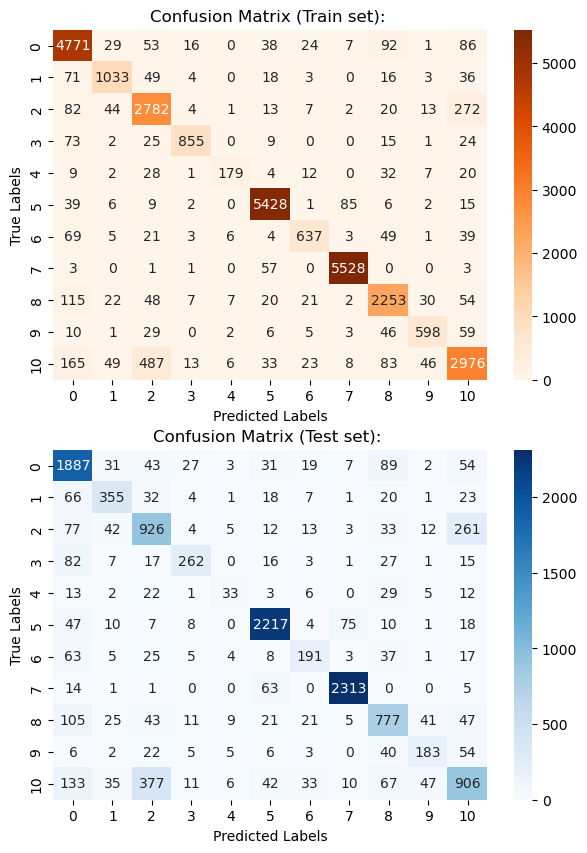

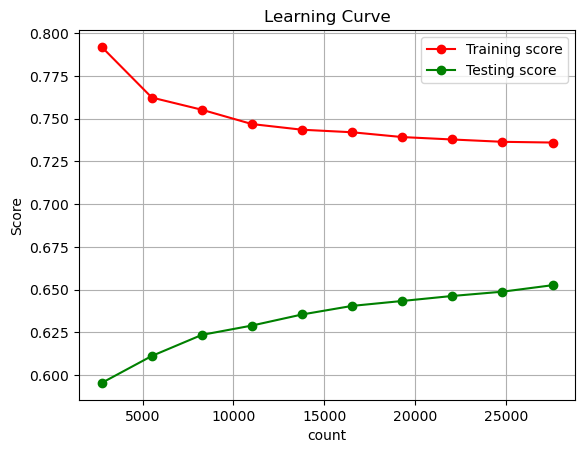

In [218]:
plot_lc(best, X_train_tfidf, y_train, X_test_tfidf, y_test)

In [219]:
X = df['vectorized_TSD']
y = df['category_verification_encoded']


In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_array = np.array([np.array(vec) for vec in X_train])
X_test_array = np.array([np.array(vec) for vec in X_test])

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'penalty': ['l1', 'l2'],          
    'max_iter': [100, 200, 500]}

log_reg_classifier = LogisticRegression()

grid_search = GridSearchCV(log_reg_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_array, y_train)



y_pred = grid_search.predict(X_test_array)
y_train_pred=grid_search.predict(X_train_array)
acc_train=accuracy_score(y_train,y_train_pred)
acc_test=accuracy_score(y_test,y_pred)
print("train_accuracy: {}".format(acc_train))
print("test_accuracy: {}".format(acc_test))
model_pramater.append({"name":"hyper_parameter_lg","train_score":acc_train,"test_score":acc_test})


print(classification_report(y_test, y_pred))
print("Best_parameter:", grid_search.best_params_)





# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation accuracy:", grid_search.best_score_)

# # Evaluate the best model on test data
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_array)
# print("Accuracy on test data:", accuracy_score(y_test, y_pred))


train_accuracy: 0.6575020322842875
test_accuracy: 0.6466147950296133
              precision    recall  f1-score   support

           0       0.61      0.80      0.69      1446
           1       0.55      0.29      0.38       351
           2       0.55      0.57      0.56       921
           3       0.52      0.27      0.35       286
           4       0.36      0.15      0.22        84
           5       0.76      0.80      0.78      1598
           6       0.21      0.03      0.06       118
           7       0.82      0.89      0.85      1598
           8       0.00      0.00      0.00       158
           9       0.52      0.52      0.52       733
          10       0.38      0.22      0.28       216
          11       0.51      0.52      0.51      1102

    accuracy                           0.65      8611
   macro avg       0.48      0.42      0.43      8611
weighted avg       0.62      0.65      0.63      8611

Best_parameter: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2'}


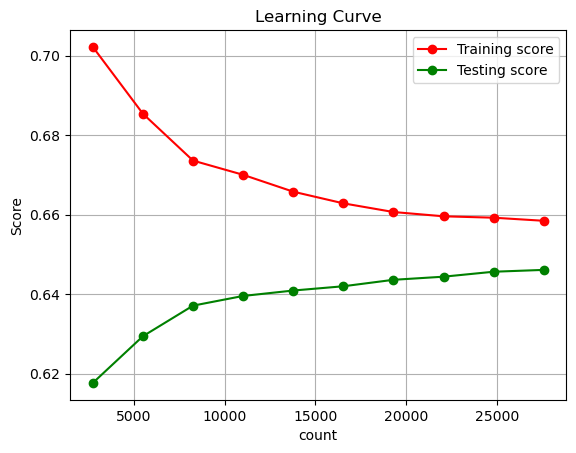

In [221]:
plot_lc(grid_search.best_estimator_, X_train_array, y_train, X_test_array, y_test)

<a id="10"></a> 
### Evaluation metric
#### [back](#0)

In [222]:
model_pramater

[{'name': 'M_NB',
  'train_score': 0.6626117756358146,
  'test_score': 0.6242016026013238},
 {'name': 'log_reg',
  'train_score': 0.6579955870398327,
  'test_score': 0.6466147950296133},
 {'name': 'hyper_parameter_M_NB',
  'train_score': 0.7354836836604344,
  'test_score': 0.6550923237719196},
 {'name': 'hyper_parameter_lg',
  'train_score': 0.6575020322842875,
  'test_score': 0.6466147950296133}]

<Figure size 1000x600 with 0 Axes>

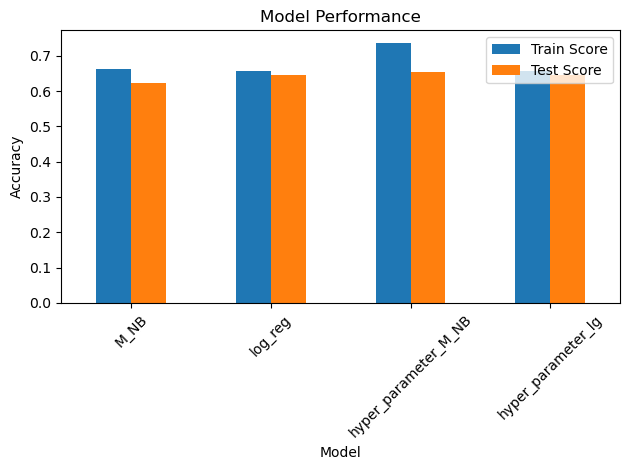

In [223]:
dfr = pd.DataFrame(model_pramater)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
dfr.plot(x='name', y=['train_score', 'test_score'], kind='bar')
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(["Train Score", "Test Score"])
plt.tight_layout()
plt.show()

In [224]:
dfr

name  train_score  test_score
0                  M_NB     0.662612    0.624202
1               log_reg     0.657996    0.646615
2  hyper_parameter_M_NB     0.735484    0.655092
3    hyper_parameter_lg     0.657502    0.646615

========================================end=================

<a id="11"></a> 
## annexure
#### [back](#0)

In [225]:
# Remove rows with NaN values in the 'price' column
df.dropna(subset=['publisher_name_encoded','author_count','publication_year'], inplace=True)


In [228]:
X = df[['publisher_name_encoded','author_count','publication_year']]
y = df['book_price']


In [229]:
# Replace NaN values in the 'price' column with the mean of non-missing values
mean_price = df['book_price'].mean()
df['book_price'].fillna(mean_price, inplace=True)


In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X is your feature matrix and y is the target variable 'book_price'
# X_array = np.array(X.tolist())
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 3146.2871261030255
R-squared Score: 0.10321066602480156
